In [1]:
# faceMask hDDM face ratings analysis script: mask analyses of false negatives (failing to ID correct emotion)
# 12/07/20

# note: to be run within python 3.5 environment named "hddm" (from console: 'source activate hddm')
# confirm jupyter notebook is launching from "hddm" environment (see top-right: 'conda env:hddm')

# set up
import numpy as np
print(np.__version__) # should be 1.11.3

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from patsy import dmatrix

import hddm
print(hddm.__version__) # should be 0.6.0

1.11.1
0.6.0


C:\Users\becky\Anaconda3\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


In [2]:
# load hDDM-processed data from CSV file into a NumPy structured array
data = hddm.load_csv('faceMask2_hddm_proc.csv')
                     
# flip 'no' response RTs to be negative
data = hddm.utils.flip_errors(data)

# check dataset
data.head(10)

subj_idx  block  faceList emotionRating  trial             stimulus  \
0  lbmmswtrr0mpvov      0         3     surprised      0  _faces/HM08_F_X.jpg   
1  lbmmswtrr0mpvov      0         3     surprised      1  _faces/BM17_R_X.jpg   
2  lbmmswtrr0mpvov      0         3     surprised      2  _faces/WF05_S_X.jpg   
3  lbmmswtrr0mpvov      0         3     surprised      3  _faces/BM17_R_L.jpg   
4  lbmmswtrr0mpvov      0         3     surprised      4  _faces/BF10_D_X.jpg   
5  lbmmswtrr0mpvov      0         3     surprised      5  _faces/BF15_F_L.jpg   
6  lbmmswtrr0mpvov      0         3     surprised      6  _faces/AM07_S_X.jpg   
7  lbmmswtrr0mpvov      0         3     surprised      7  _faces/BF10_D_L.jpg   
8  lbmmswtrr0mpvov      0         3     surprised      8  _faces/AM07_S_U.jpg   
9  lbmmswtrr0mpvov      0         3     surprised      9  _faces/BM16_H_U.jpg   

       face model ethnicity sex expression      mask  response        rt  \
0  HM08_F_X  HM08         H   M    fearful  baseline         1  2.248290   
1  BM17_R_X  BM17         B   M  surprised  baseline         1  1.122130   
2  WF05_S_X  WF05         W   F        sad  baseline         0 -1.093135   
3  BM17_R_L  BM17         B   M  surprised     lower         1  1.347000   
4  BF10_D_X  BF10         B   F  disgusted  baseline         0 -1.586875   
5  BF15_F_L  BF15         B   F    fearful     lower         1  1.020070   
6  AM07_S_X  AM07         A   M        sad  baseline         0 -1.092280   
7  BF10_D_L  BF10         B   F  disgusted     lower         0 -1.574250   
8  AM07_S_U  AM07         A   M        sad     upper         0 -1.219265   
9  BM16_H_U  BM16         B   M      happy     upper         0 -1.092995   

   faceAngry  faceDisgusted  faceFearful  faceHappy  faceSad  faceSurprised  
0          0              0          100          0        0              0  
1          0              0            0          0        0            100  
2          0              0            0          0      100              0  
3          0              0            0          0        0             50  
4          0            100            0          0        0              0  
5          0              0           50          0        0              0  
6          0              0            0          0      100              0  
7          0             50            0          0        0              0  
8          0              0            0          0       50              0  
9          0              0            0         50        0              0

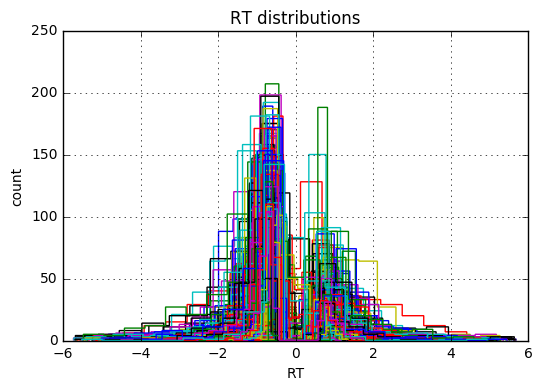

In [3]:
# plot RTs for each participant
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in data.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)

In [4]:
# subset dataset by emotion rating type (sad) and facial expression (angry)
sa_data = data.loc[(data['emotionRating'] == 'sad') & (data['expression'] == 'angry')]
sa_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
110  lbmmswtrr0mpvov      2         1           sad    110   
116  lbmmswtrr0mpvov      2         1           sad    116   
118  lbmmswtrr0mpvov      2         1           sad    118   
129  lbmmswtrr0mpvov      2         1           sad    129   
131  lbmmswtrr0mpvov      2         1           sad    131   
133  lbmmswtrr0mpvov      2         1           sad    133   
136  lbmmswtrr0mpvov      2         1           sad    136   
142  lbmmswtrr0mpvov      2         1           sad    142   
149  lbmmswtrr0mpvov      2         1           sad    149   
537  mr81dhy9r5lxu8r      4         3           sad    218   

                stimulus      face model ethnicity sex expression      mask  \
110  _faces/AF06_A_U.jpg  AF06_A_U  AF06         A   F      angry     upper   
116  _faces/AF06_A_L.jpg  AF06_A_L  AF06         A   F      angry     lower   
118  _faces/HM08_A_L.jpg  HM08_A_L  HM08         H   M      angry     lower   
129  _faces/AF06_A_X.jpg  AF06_A_X  AF06         A   F      angry  baseline   
131  _faces/HM08_A_X.jpg  HM08_A_X  HM08         H   M      angry  baseline   
133  _faces/HM08_A_U.jpg  HM08_A_U  HM08         H   M      angry     upper   
136  _faces/BF15_A_L.jpg  BF15_A_L  BF15         B   F      angry     lower   
142  _faces/BF15_A_X.jpg  BF15_A_X  BF15         B   F      angry  baseline   
149  _faces/BF15_A_U.jpg  BF15_A_U  BF15         B   F      angry     upper   
537  _faces/WM09_A_X.jpg  WM09_A_X  WM09         W   M      angry  baseline   

     response        rt  faceAngry  faceDisgusted  faceFearful  faceHappy  \
110         0 -0.955840         50              0            0          0   
116         0 -0.902085         50              0            0          0   
118         1  0.963640         50              0            0          0   
129         0 -0.844395        100              0            0          0   
131         1  1.060995        100              0            0          0   
133         1  0.771165         50              0            0          0   
136         0 -1.005215         50              0            0          0   
142         0 -1.731690        100              0            0          0   
149         0 -1.093065         50              0            0          0   
537         1  1.860000        100              0            0          0   

     faceSad  faceSurprised  
110        0              0  
116        0              0  
118        0              0  
129        0              0  
131        0              0  
133        0              0  
136        0              0  
142        0              0  
149        0              0  
537        0              0

In [73]:
# drop any subjects missing columns in design matrix (otherwise produces error)
sa_data = sa_data[(sa_data.subj_idx != 'dqph4ch0mkofejw') & (sa_data.subj_idx != 'hdn2l3df216jykn') & (sa_data.subj_idx != 'me8doxrmo9vj9dx') & (sa_data.subj_idx != 'jkgqk1co77rw24c') & (sa_data.subj_idx != 'tz7c8yczxjyfo0y')]

In [74]:
# define model
m_sa = hddm.HDDMRegressor(sa_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 36405.8 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean         std        2.5q        25q         50q        75q       97.5q       mc err
a                                    1.61537   0.0337028      1.5504    1.59245     1.61467     1.6379     1.68285   0.00116649
a_std                               0.393849   0.0359384    0.328849   0.368075    0.392824    0.41812    0.467796   0.00173973
a_subj.09coqg8hlpux6fe               1.47355    0.216259     1.11389    1.31702     1.45711    1.60883     1.95737   0.00440394
a_subj.0b3t2skj9mlhbkn               1.53107    0.318927     1.01504    1.30275     1.50155    1.71562     2.27881   0.00884276
a_subj.0bcg7mtj2n1jjw9               2.25244    0.350262     1.65957    1.99529     2.22355    2.48322     3.02123   0.00948292
a_subj.0s53r30oouek89b               2.18954    0.339203     1.64257    1.94975      2.1564    2.39487     2.94901   0.00824121
a_subj.0uj9gbhag3o1w1v               2.22261    0.306466     1.71259     2.0074     2.19367    2.40278  

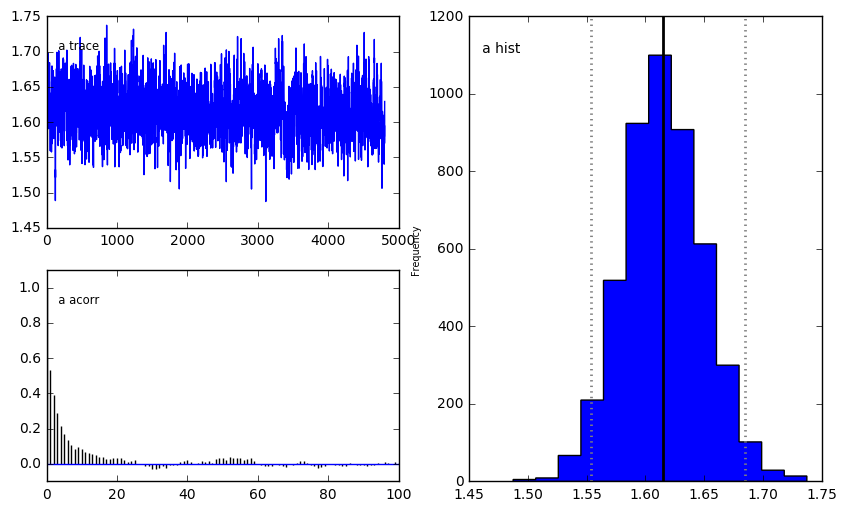

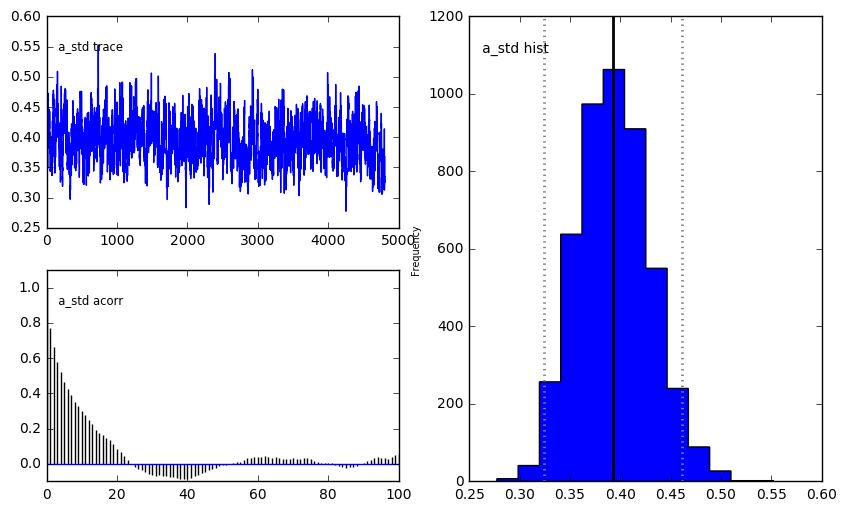

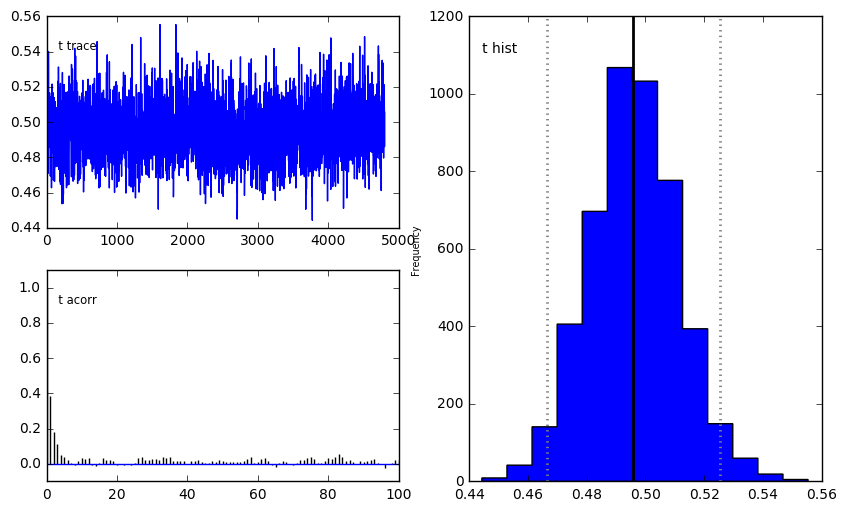

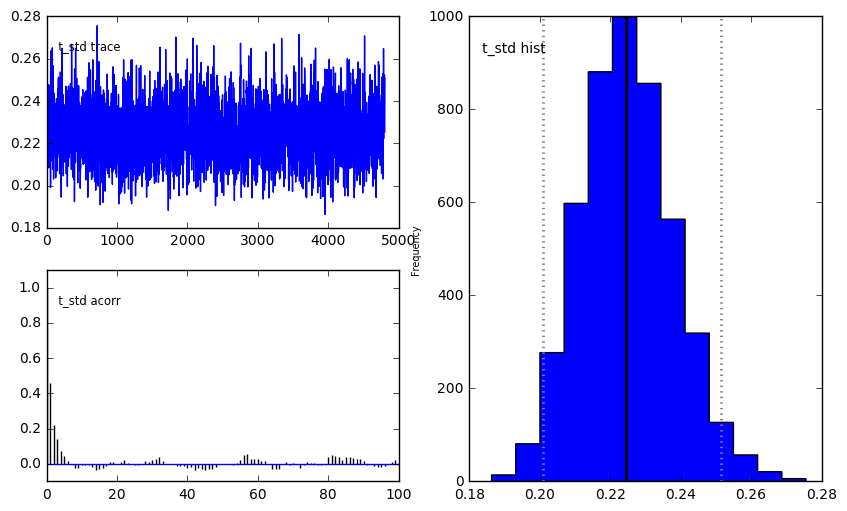

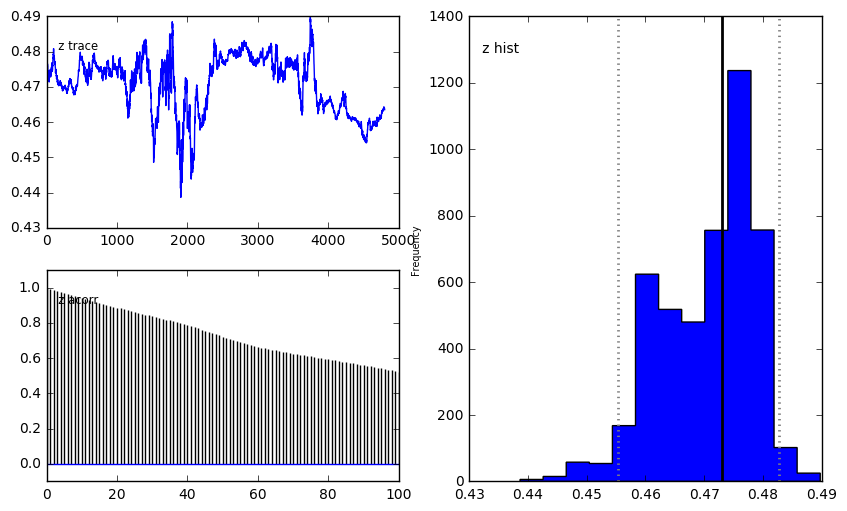

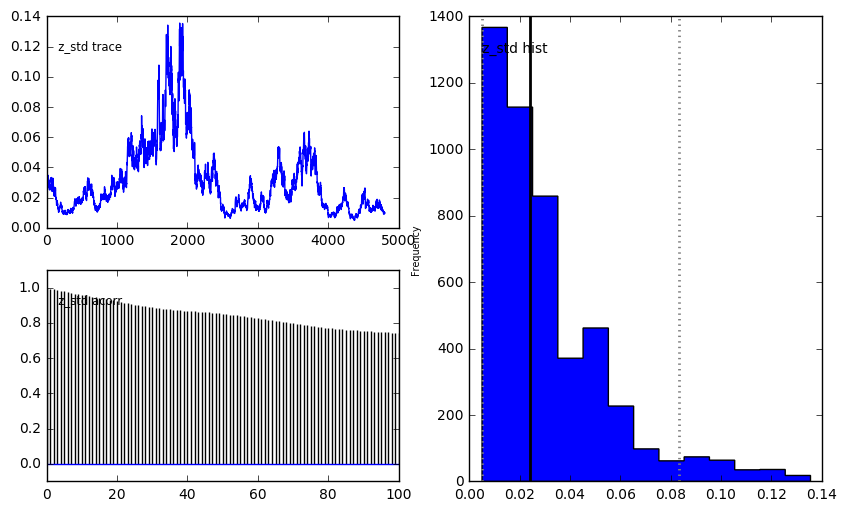

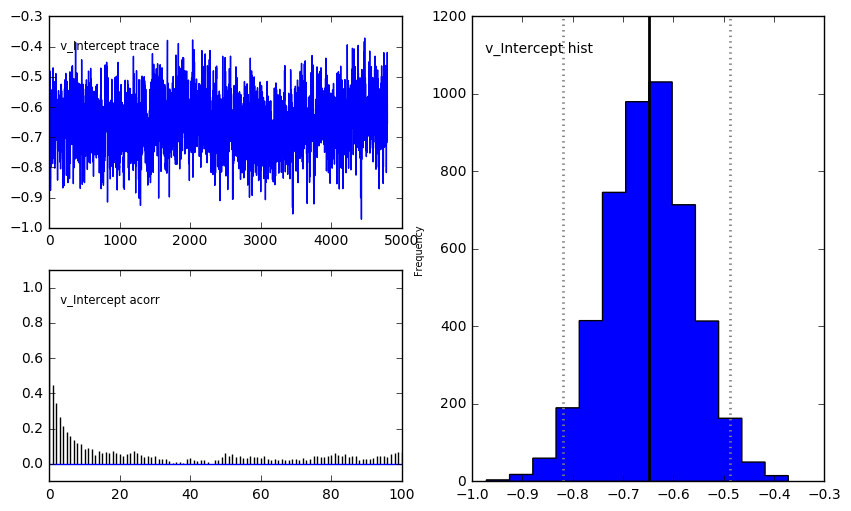

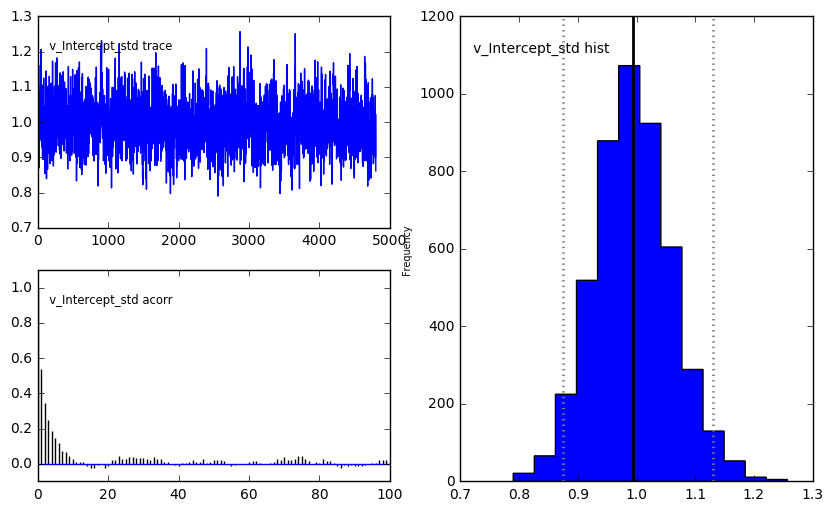

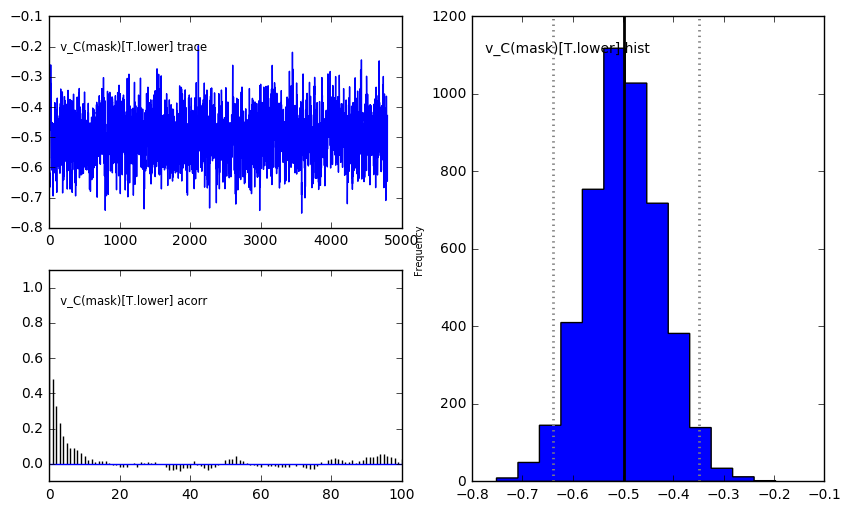

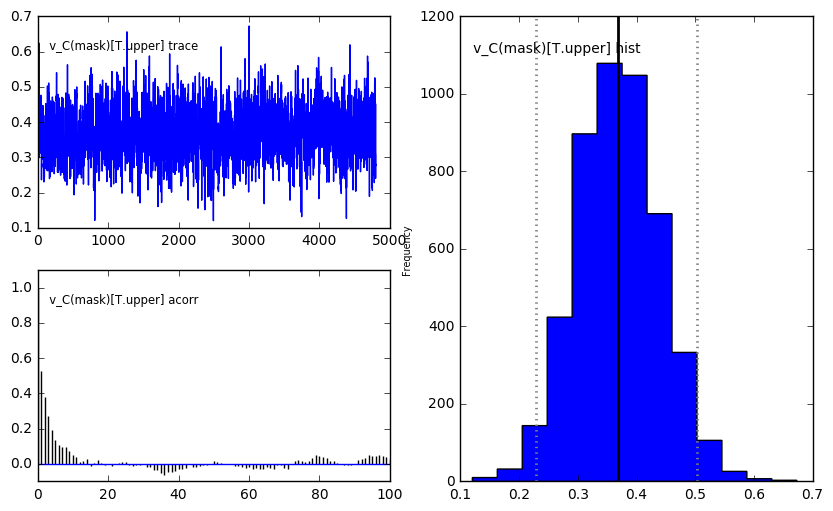

In [75]:
# run model
m_sa.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_sa.print_stats()
m_sa.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                        mean        std       2.5q        25q  \
a                                    1.61537  0.0337028     1.5504    1.59245   
a_std                               0.393849  0.0359384   0.328849   0.368075   
a_subj.09coqg8hlpux6fe               1.47355   0.216259    1.11389    1.31702   
a_subj.0b3t2skj9mlhbkn               1.53107   0.318927    1.01504    1.30275   
a_subj.0bcg7mtj2n1jjw9               2.25244   0.350262    1.65957    1.99529   
a_subj.0s53r30oouek89b               2.18954   0.339203    1.64257    1.94975   
a_subj.0uj9gbhag3o1w1v               2.22261   0.306466    1.71259     2.0074   
a_subj.17nzn4k8r1qkmrn                2.1702   0.306862    1.64626    1.95046   
a_subj.1fdkw2qjx3hc3lk               1.47241   0.235606    1.07873    1.30516   
a_subj.1mla0dmotqefnav               1.90984   0.286675    1.42661    1.70907   
a_subj.23hr9tl84h3zhw3               1.84588   0.305088    1.32631    1.63247   
a_subj.27muqwvalwne26r      

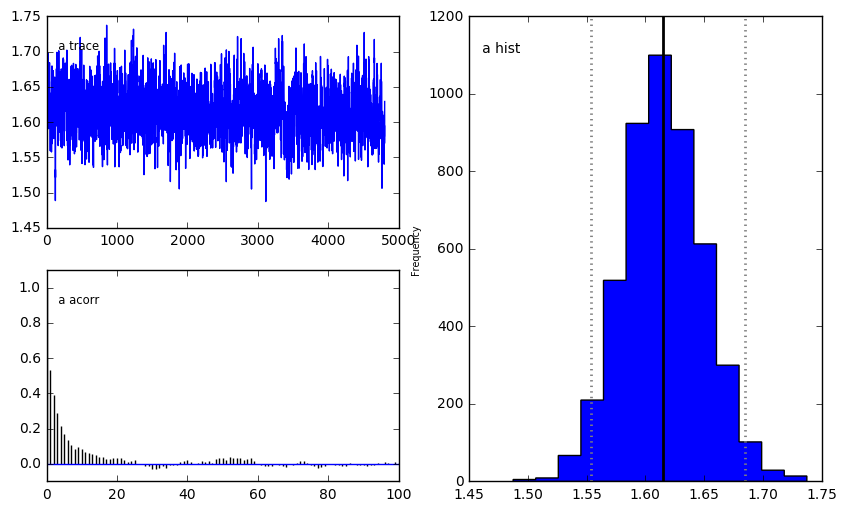

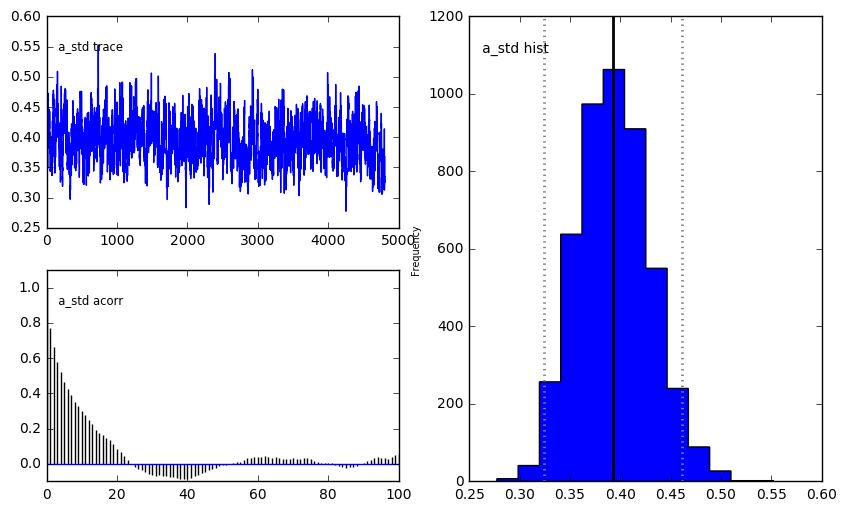

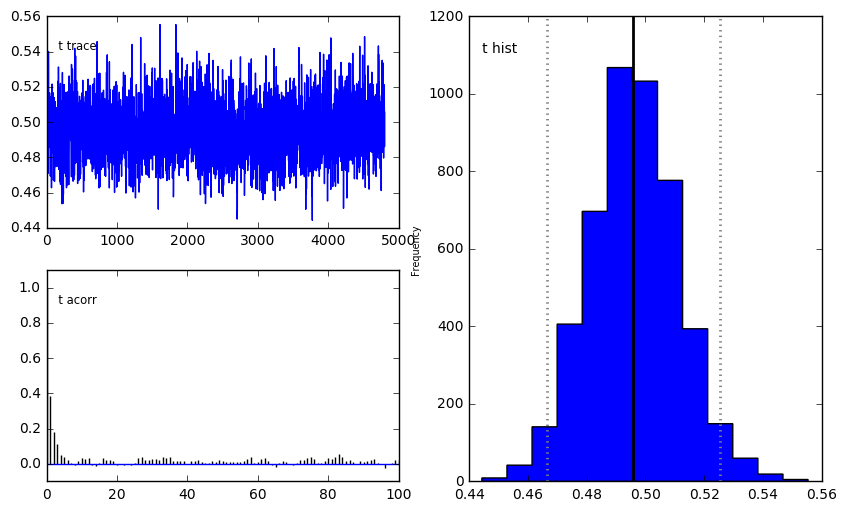

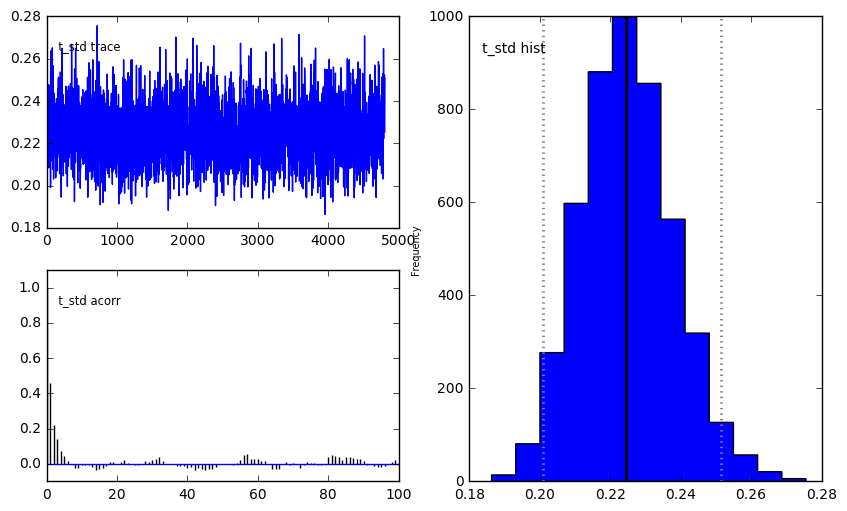

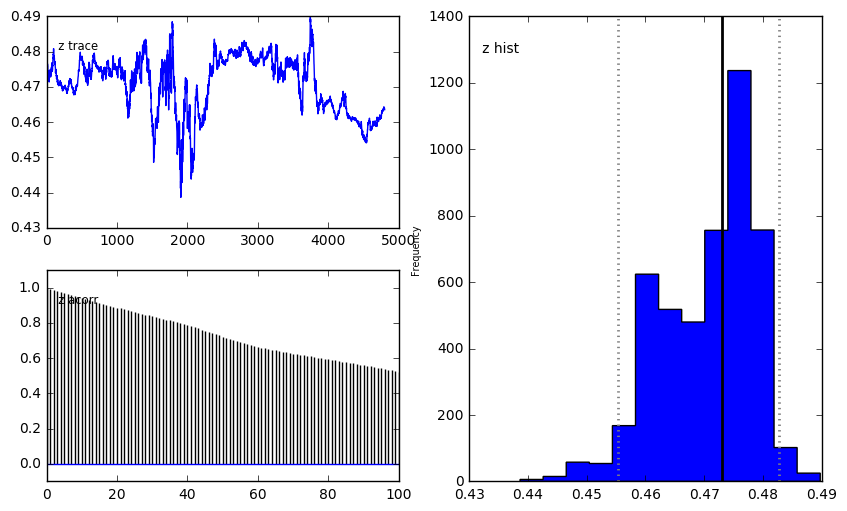

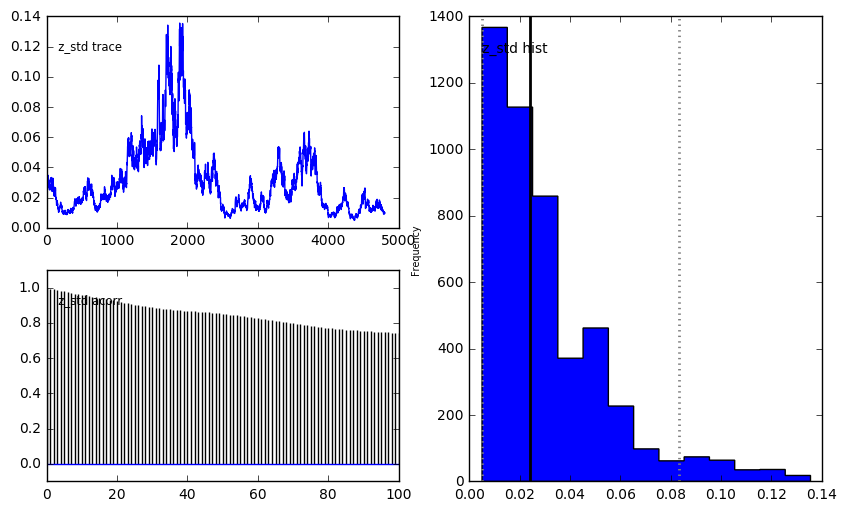

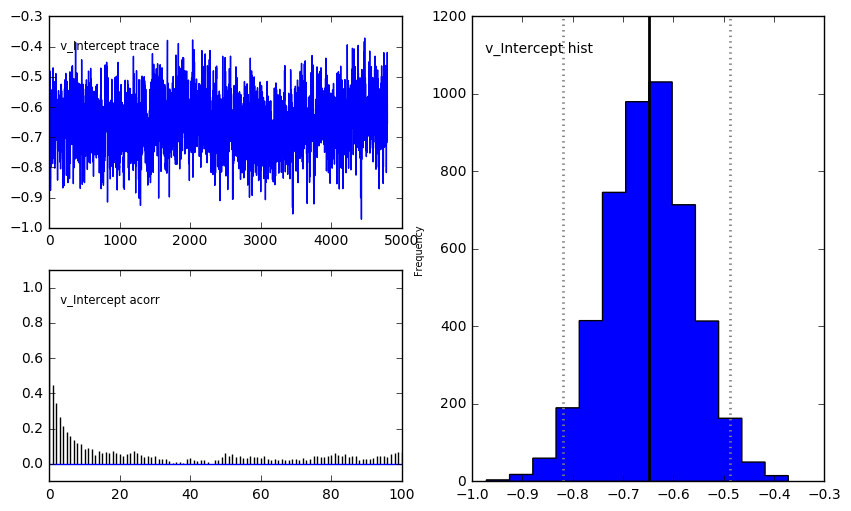

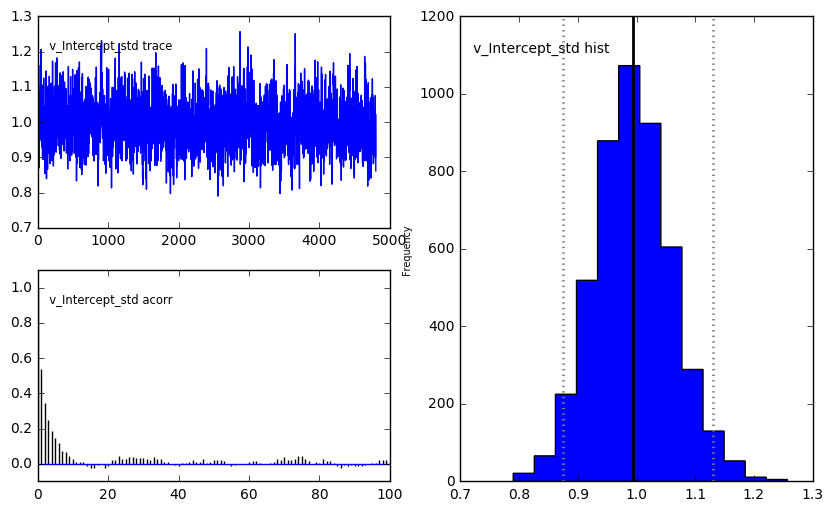

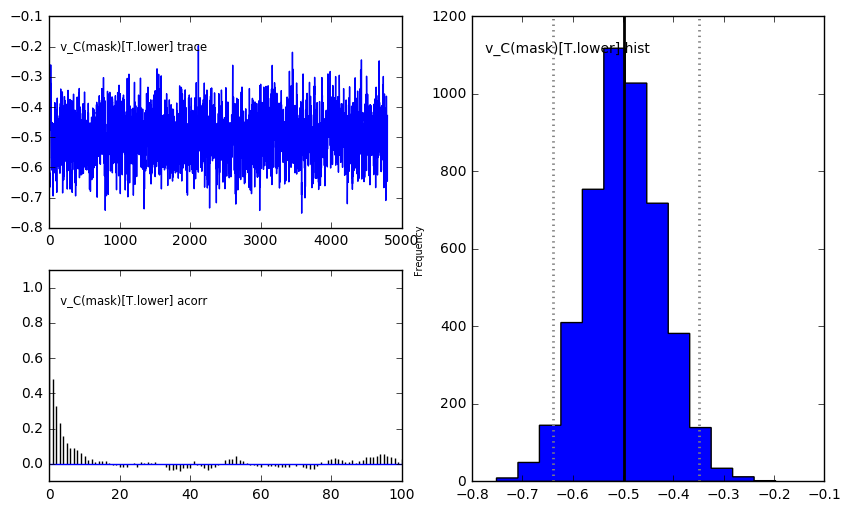

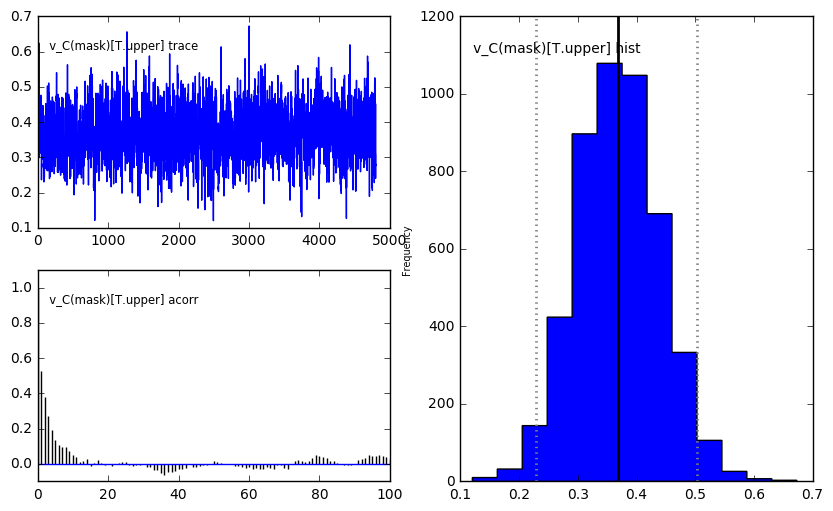

In [76]:
# save model stats
sa_stats = m_sa.gen_stats()
print(sa_stats)
sa_stats.to_csv('sa_5000/faceMask_hddm_drift_maskFalsePositives_sa_5000.csv', index=True)

# save model posterior plots
m_sa.plot_posteriors(path='sa_5000/_posteriors', save=True)

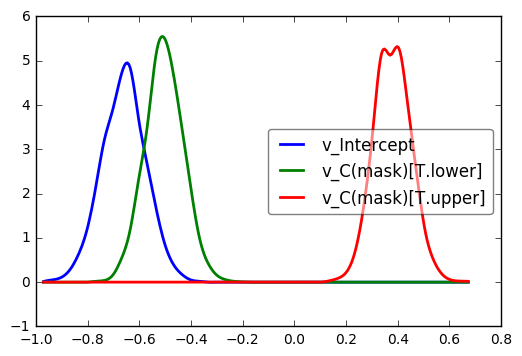

In [78]:
# plot model posteriors by mask
sa_v_none, sa_v_lower, sa_v_upper = m_sa.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([sa_v_none, sa_v_lower, sa_v_upper])
plt.savefig('sa_5000/faceMask_hddm_drift_maskFalsePositives_sa_5000_v_mask.pdf')

In [79]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(sa_v_none < 0) = ", (sa_v_none.trace() < 0).mean())
print("P(sa_v_lower < 0) = ", (sa_v_lower.trace() < 0).mean())
print("P(sa_v_upper > 0) = ", (sa_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(sa_v_lower < sa_v_upper) = ", (sa_v_lower.trace() < sa_v_upper.trace()).mean())

P(sa_v_none < 0) =  1.0
P(sa_v_lower < 0) =  1.0
P(sa_v_upper > 0) =  1.0
P(sa_v_lower < sa_v_upper) =  1.0


In [7]:
# subset dataset by emotion rating type (sad) and facial expression (disgusted)
sd_data = data.loc[(data['emotionRating'] == 'sad') & (data['expression'] == 'disgusted')]
sd_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
119  lbmmswtrr0mpvov      2         1           sad    119   
122  lbmmswtrr0mpvov      2         1           sad    122   
125  lbmmswtrr0mpvov      2         1           sad    125   
137  lbmmswtrr0mpvov      2         1           sad    137   
143  lbmmswtrr0mpvov      2         1           sad    143   
147  lbmmswtrr0mpvov      2         1           sad    147   
153  lbmmswtrr0mpvov      2         1           sad    153   
154  lbmmswtrr0mpvov      2         1           sad    154   
158  lbmmswtrr0mpvov      2         1           sad    158   
545  mr81dhy9r5lxu8r      4         3           sad    226   

                stimulus      face model ethnicity sex expression      mask  \
119  _faces/BM16_D_X.jpg  BM16_D_X  BM16         B   M  disgusted  baseline   
122  _faces/BM16_D_L.jpg  BM16_D_L  BM16         B   M  disgusted     lower   
125  _faces/AF09_D_X.jpg  AF09_D_X  AF09         A   F  disgusted  baseline   
137  _faces/AF09_D_L.jpg  AF09_D_L  AF09         A   F  disgusted     lower   
143  _faces/HM09_D_L.jpg  HM09_D_L  HM09         H   M  disgusted     lower   
147  _faces/BM16_D_U.jpg  BM16_D_U  BM16         B   M  disgusted     upper   
153  _faces/HM09_D_U.jpg  HM09_D_U  HM09         H   M  disgusted     upper   
154  _faces/HM09_D_X.jpg  HM09_D_X  HM09         H   M  disgusted  baseline   
158  _faces/AF09_D_U.jpg  AF09_D_U  AF09         A   F  disgusted     upper   
545  _faces/BF10_D_X.jpg  BF10_D_X  BF10         B   F  disgusted  baseline   

     response        rt  faceAngry  faceDisgusted  faceFearful  faceHappy  \
119         0 -0.850755          0            100            0          0   
122         0 -0.931440          0             50            0          0   
125         0 -0.812800          0            100            0          0   
137         0 -1.116765          0             50            0          0   
143         0 -1.126215          0             50            0          0   
147         0 -0.748355          0             50            0          0   
153         0 -0.915520          0             50            0          0   
154         0 -0.804770          0            100            0          0   
158         0 -0.700915          0             50            0          0   
545         1  4.185000          0            100            0          0   

     faceSad  faceSurprised  
119        0              0  
122        0              0  
125        0              0  
137        0              0  
143        0              0  
147        0              0  
153        0              0  
154        0              0  
158        0              0  
545        0              0

In [8]:
# drop any subjects missing columns in design matrix (otherwise produces error) 
sd_data = sd_data[(sd_data.subj_idx != 'dqph4ch0mkofejw') & (sd_data.subj_idx != 'me8doxrmo9vj9dx')]

In [9]:
# define model
m_sd = hddm.HDDMRegressor(sd_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 43816.2 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean         std       2.5q         25q         50q        75q        97.5q       mc err
a                                   1.84806   0.0573082    1.74259     1.80752     1.84549    1.88506      1.96685   0.00258599
a_std                              0.601031   0.0498228   0.509361    0.567239    0.598049   0.631571     0.707049   0.00215877
a_subj.09coqg8hlpux6fe              1.49548    0.312197   0.987126     1.27323     1.46172    1.67822      2.19407   0.00718735
a_subj.0b3t2skj9mlhbkn              1.91068    0.507848     1.1224     1.54184     1.84408    2.20509      3.08122    0.0166351
a_subj.0bcg7mtj2n1jjw9              2.89658    0.469494    2.05984     2.56552     2.86773     3.2014       3.8933    0.0115179
a_subj.0s53r30oouek89b               2.4917    0.461401    1.71274      2.1624     2.45667    2.77805      3.50624    0.0108649
a_subj.0uj9gbhag3o1w1v              2.15406    0.478326    1.40422     1.81305     2.09181    2.42852   

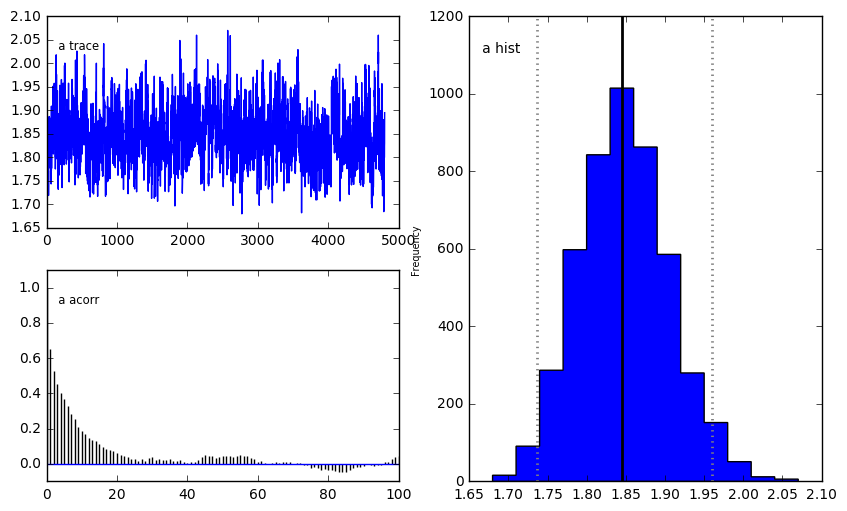

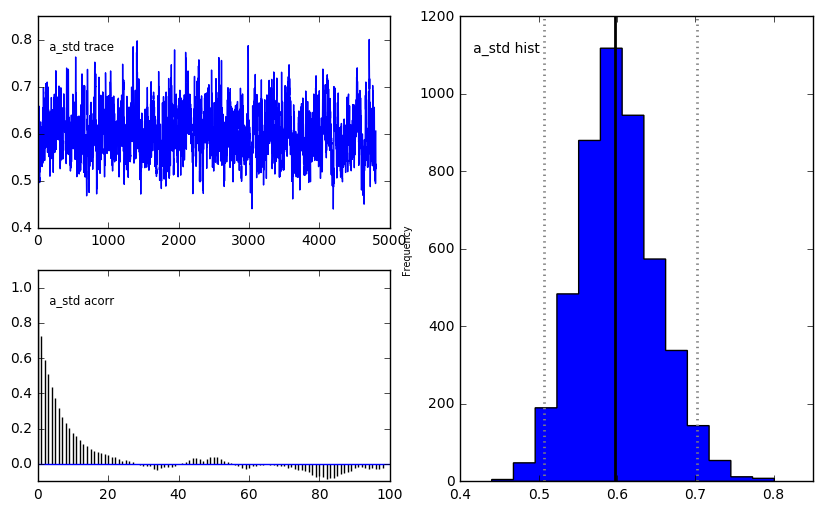

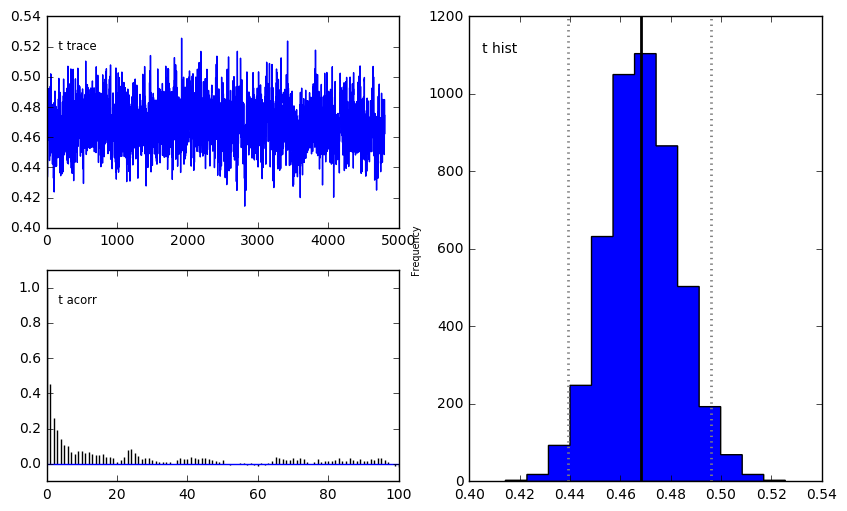

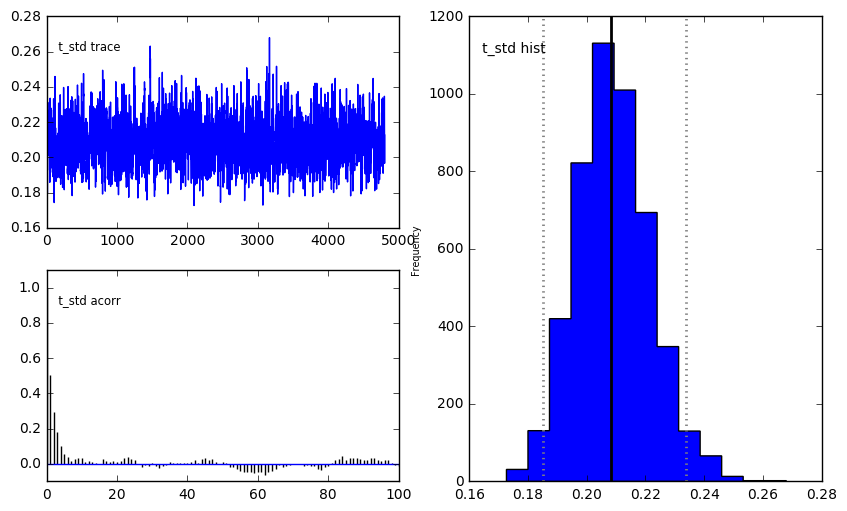

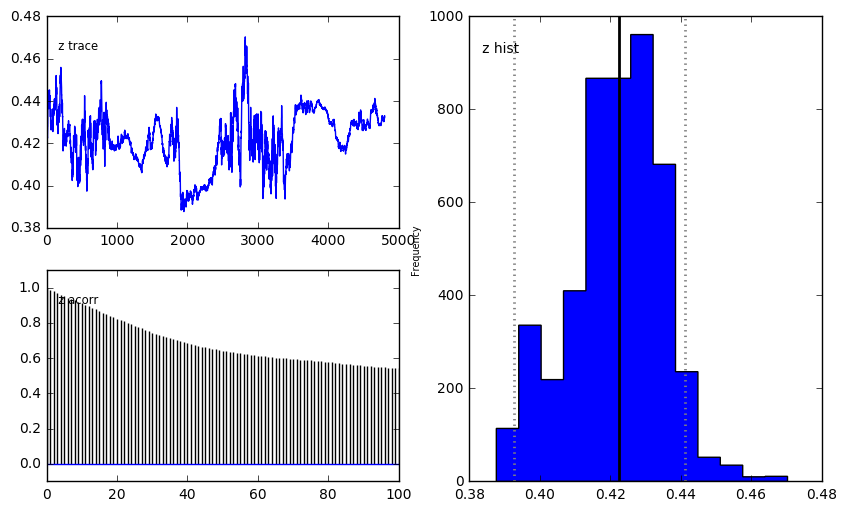

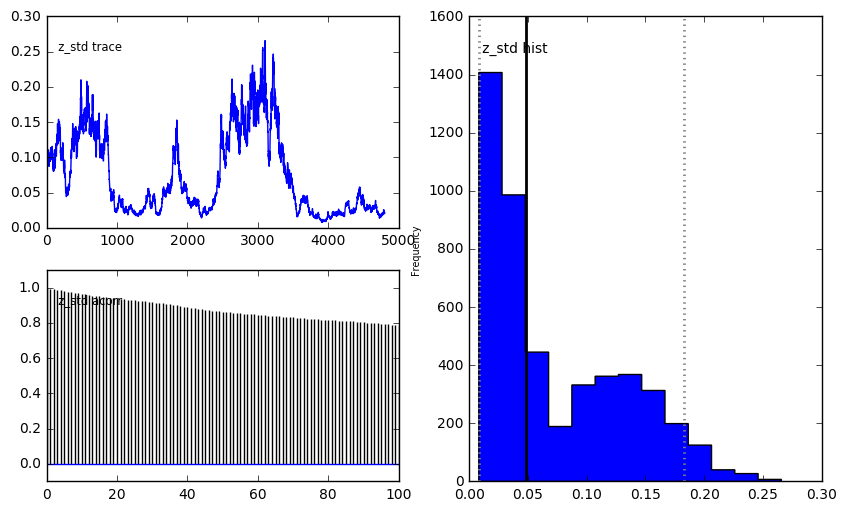

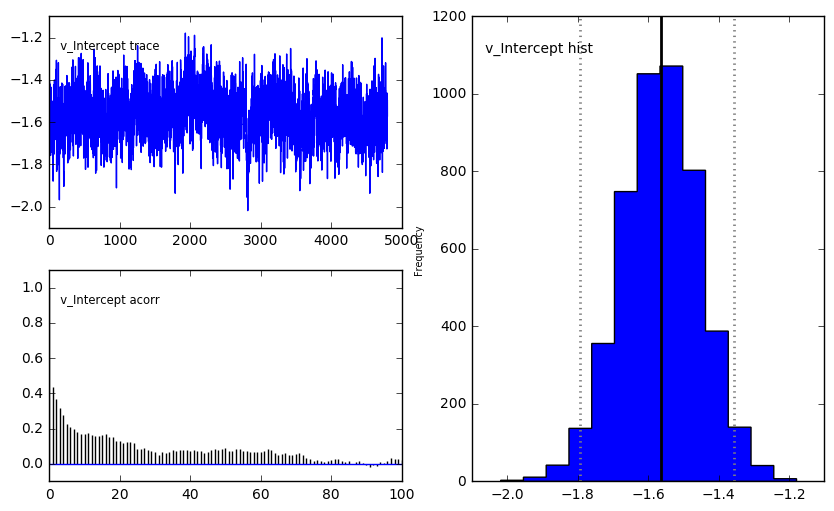

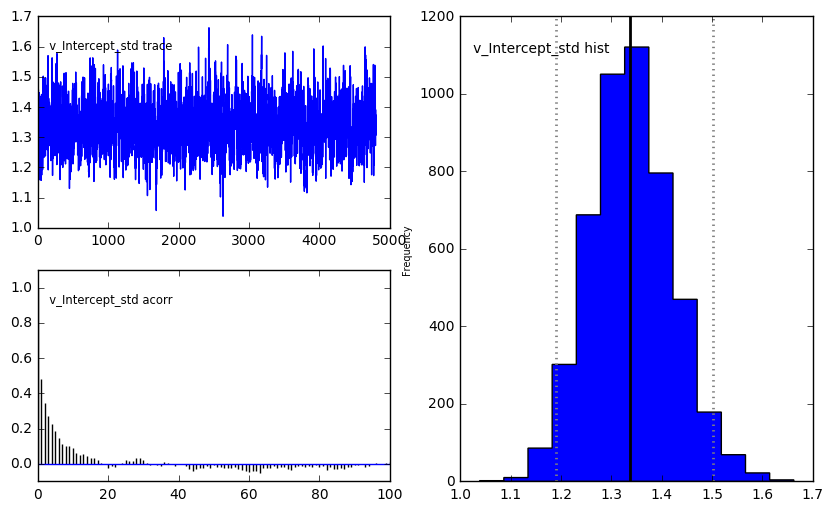

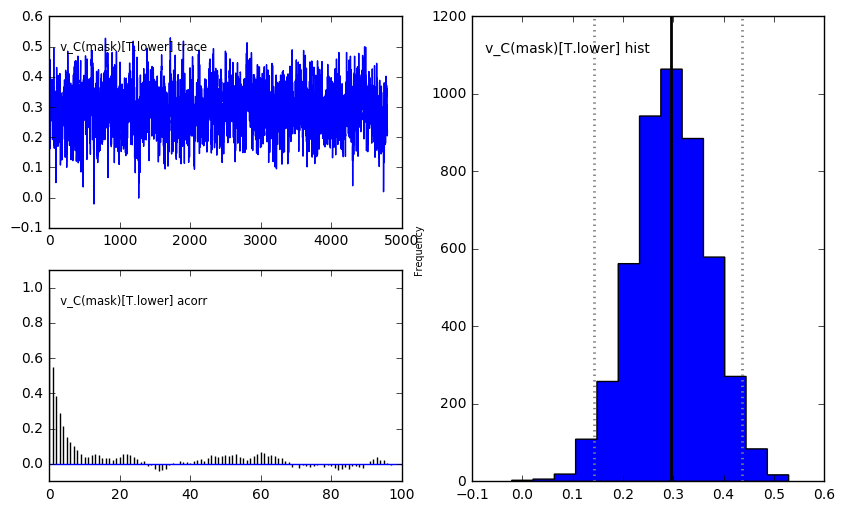

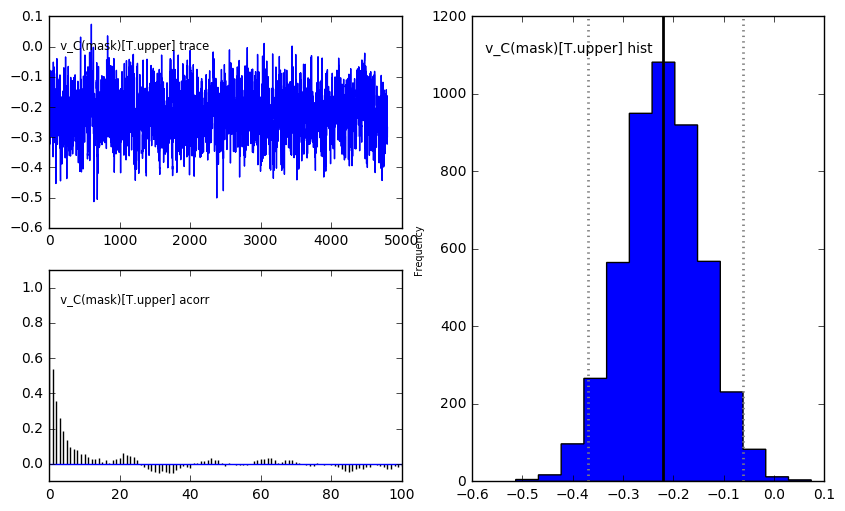

In [10]:
# run model
m_sd.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_sd.print_stats()
m_sd.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std      2.5q       25q  \
a                                   1.84806  0.0573082   1.74259   1.80752   
a_std                              0.601031  0.0498228  0.509361  0.567239   
a_subj.09coqg8hlpux6fe              1.49548   0.312197  0.987126   1.27323   
a_subj.0b3t2skj9mlhbkn              1.91068   0.507848    1.1224   1.54184   
a_subj.0bcg7mtj2n1jjw9              2.89658   0.469494   2.05984   2.56552   
a_subj.0s53r30oouek89b               2.4917   0.461401   1.71274    2.1624   
a_subj.0uj9gbhag3o1w1v              2.15406   0.478326   1.40422   1.81305   
a_subj.17nzn4k8r1qkmrn              1.78473   0.511635  0.992486   1.40793   
a_subj.1fdkw2qjx3hc3lk              1.91796   0.341417    1.3546   1.67285   
a_subj.1mla0dmotqefnav              2.05007   0.536403   1.20266    1.6702   
a_subj.23hr9tl84h3zhw3              2.11384   0.415473   1.45378   1.81489   
a_subj.27muqwvalwne26r              1.96653   0.419435   1.29357

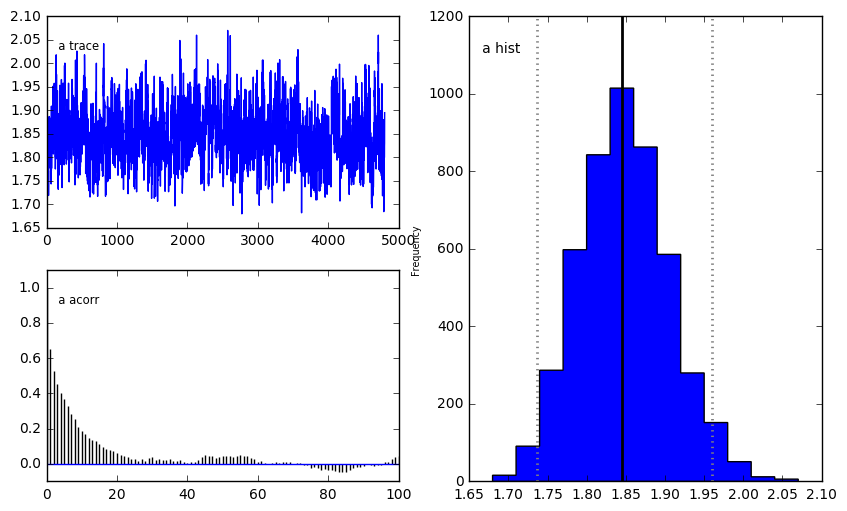

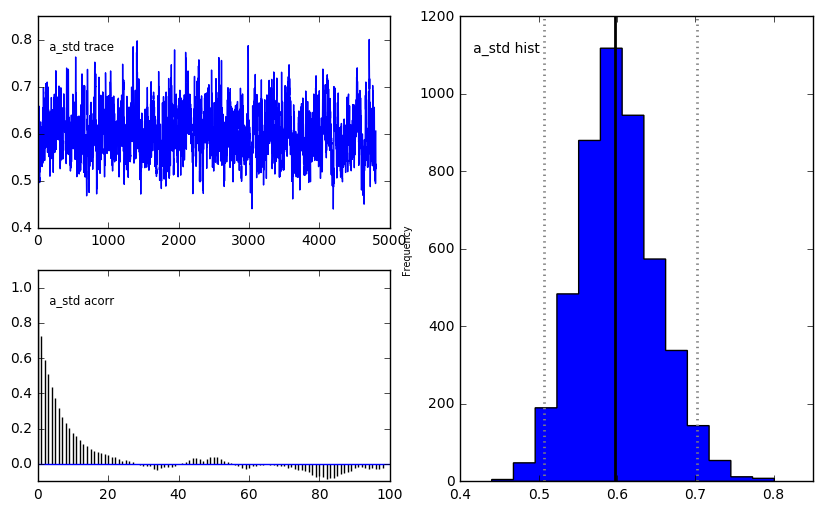

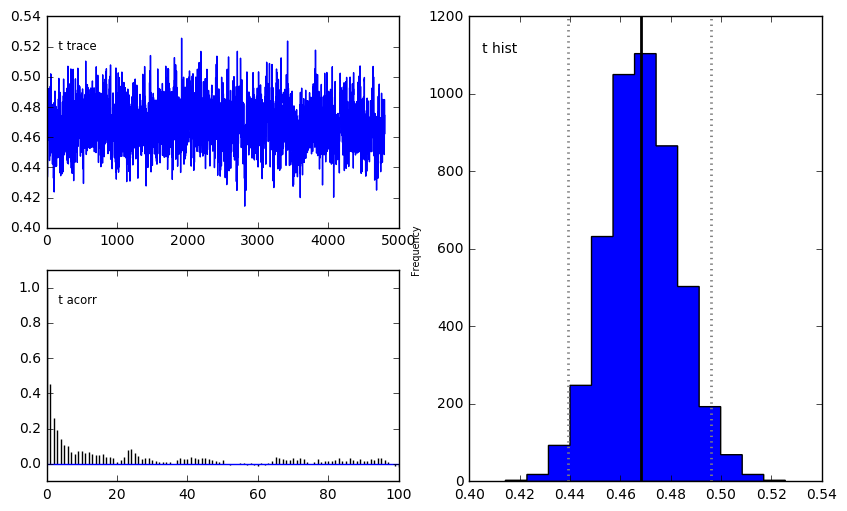

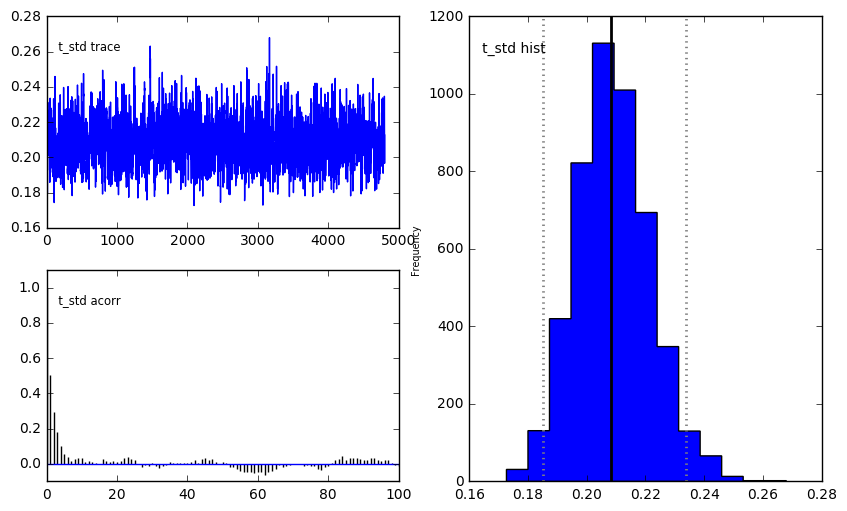

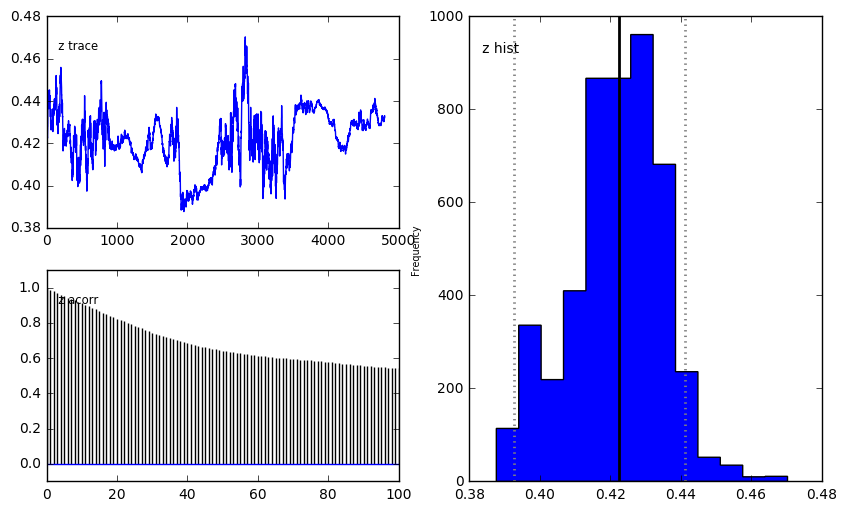

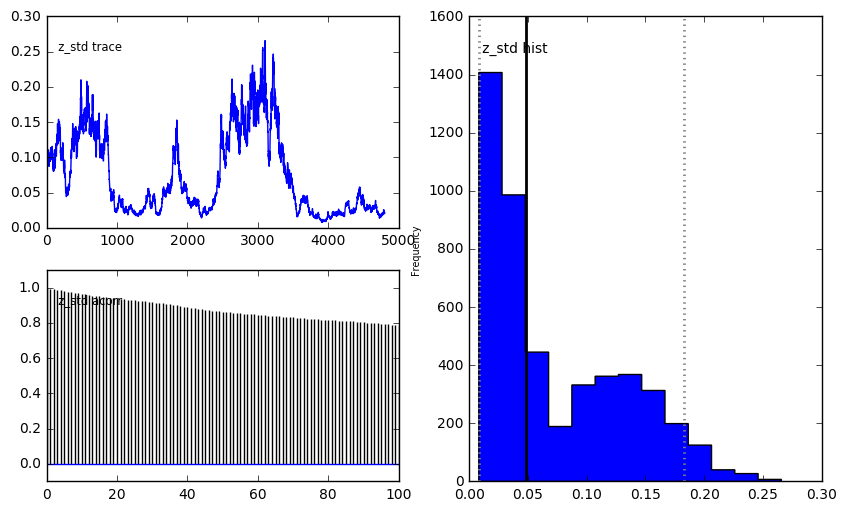

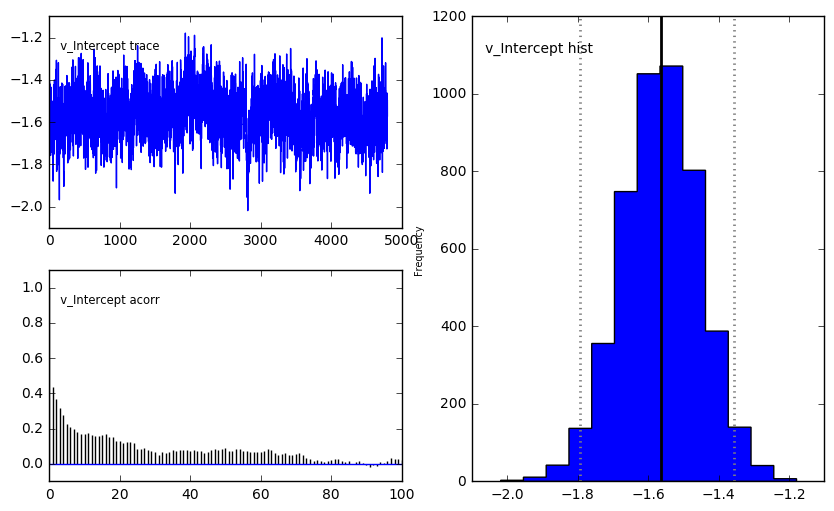

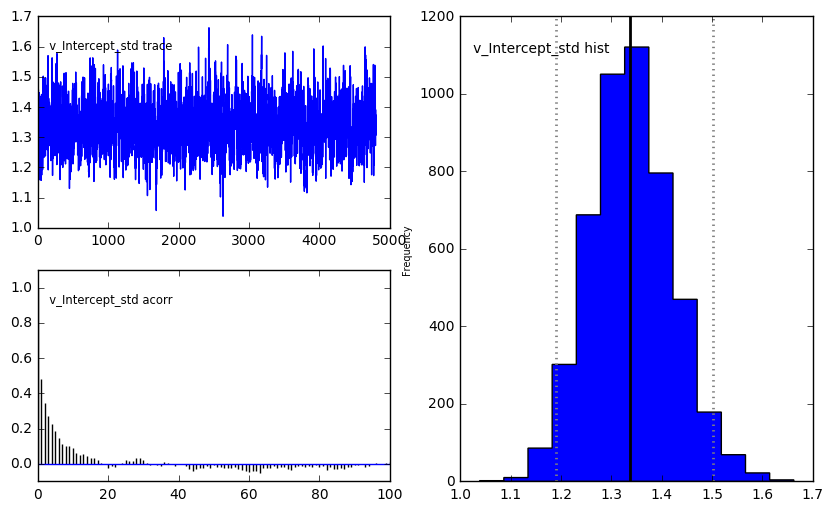

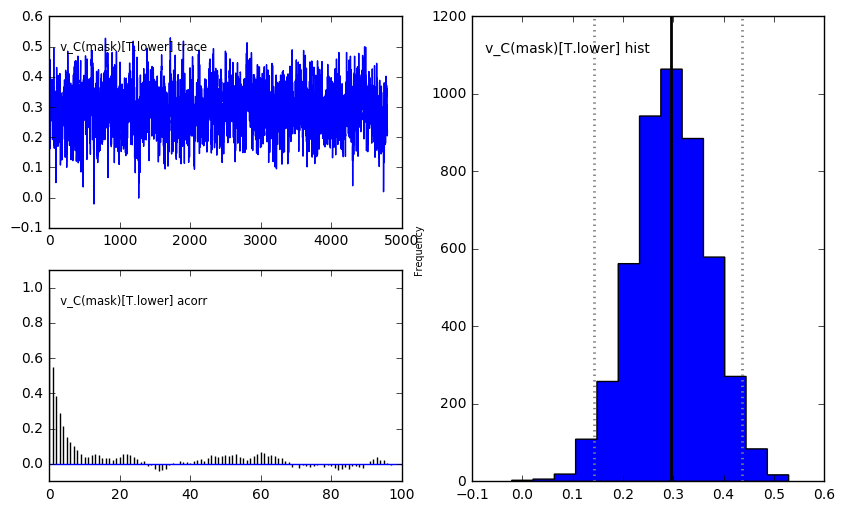

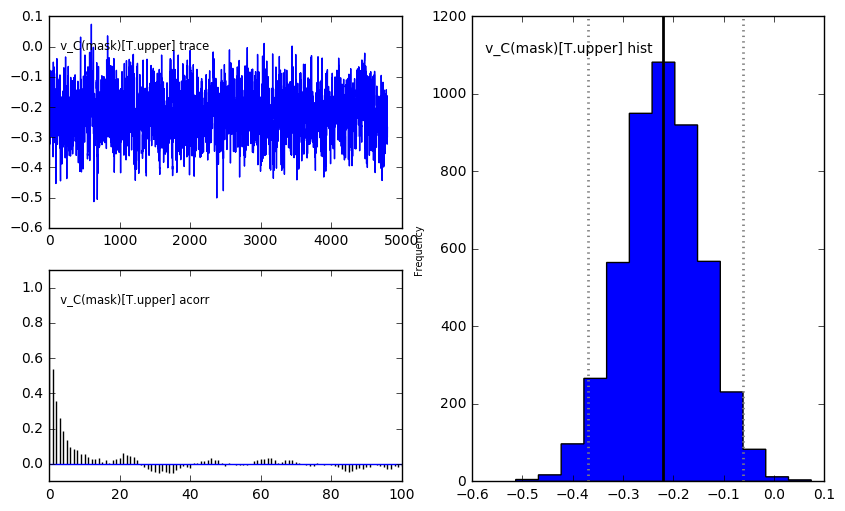

In [11]:
# save model stats
sd_stats = m_sd.gen_stats()
print(sd_stats)
sd_stats.to_csv('sd_5000/faceMask_hddm_drift_maskFalsePositives_sd_5000.csv', index=True)

# save model posterior plots
m_sd.plot_posteriors(path='sd_5000/_posteriors', save=True)

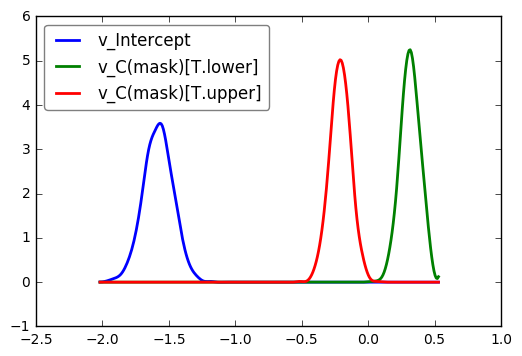

In [14]:
# plot model posteriors by mask
sd_v_none, sd_v_lower, sd_v_upper = m_sd.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([sd_v_none, sd_v_lower, sd_v_upper])
plt.savefig('sd_5000/faceMask_hddm_drift_maskFalsePositives_sd_5000_v_mask.pdf')

In [15]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(sd_v_none < 0) = ", (sd_v_none.trace() < 0).mean())
print("P(sd_v_lower < 0) = ", (sd_v_lower.trace() < 0).mean())
print("P(sd_v_upper > 0) = ", (sd_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(sd_v_lower < sd_v_upper) = ", (sd_v_lower.trace() < sd_v_upper.trace()).mean())

P(sd_v_none < 0) =  1.0
P(sd_v_lower < 0) =  0.000416666666667
P(sd_v_upper > 0) =  0.00166666666667
P(sd_v_lower < sd_v_upper) =  0.0


In [16]:
# subset dataset by emotion rating type (sad) and facial expression (happy)
sh_data = data.loc[(data['emotionRating'] == 'sad') & (data['expression'] == 'happy')]
sh_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
108  lbmmswtrr0mpvov      2         1           sad    108   
109  lbmmswtrr0mpvov      2         1           sad    109   
117  lbmmswtrr0mpvov      2         1           sad    117   
128  lbmmswtrr0mpvov      2         1           sad    128   
135  lbmmswtrr0mpvov      2         1           sad    135   
139  lbmmswtrr0mpvov      2         1           sad    139   
141  lbmmswtrr0mpvov      2         1           sad    141   
155  lbmmswtrr0mpvov      2         1           sad    155   
161  lbmmswtrr0mpvov      2         1           sad    161   
535  mr81dhy9r5lxu8r      4         3           sad    216   

                stimulus      face model ethnicity sex expression      mask  \
108  _faces/AM07_H_L.jpg  AM07_H_L  AM07         A   M      happy     lower   
109  _faces/HF04_H_L.jpg  HF04_H_L  HF04         H   F      happy     lower   
117  _faces/AM07_H_U.jpg  AM07_H_U  AM07         A   M      happy     upper   
128  _faces/WF05_H_X.jpg  WF05_H_X  WF05         W   F      happy  baseline   
135  _faces/WF05_H_L.jpg  WF05_H_L  WF05         W   F      happy     lower   
139  _faces/AM07_H_X.jpg  AM07_H_X  AM07         A   M      happy  baseline   
141  _faces/WF05_H_U.jpg  WF05_H_U  WF05         W   F      happy     upper   
155  _faces/HF04_H_U.jpg  HF04_H_U  HF04         H   F      happy     upper   
161  _faces/HF04_H_X.jpg  HF04_H_X  HF04         H   F      happy  baseline   
535  _faces/BM16_H_X.jpg  BM16_H_X  BM16         B   M      happy  baseline   

     response        rt  faceAngry  faceDisgusted  faceFearful  faceHappy  \
108         0 -1.507335          0              0            0         50   
109         0 -0.808135          0              0            0         50   
117         0 -0.772660          0              0            0         50   
128         0 -0.851970          0              0            0        100   
135         0 -0.812810          0              0            0         50   
139         0 -0.812395          0              0            0        100   
141         0 -0.643525          0              0            0         50   
155         0 -0.747770          0              0            0         50   
161         0 -0.913675          0              0            0        100   
535         0 -2.919000          0              0            0        100   

     faceSad  faceSurprised  
108        0              0  
109        0              0  
117        0              0  
128        0              0  
135        0              0  
139        0              0  
141        0              0  
155        0              0  
161        0              0  
535        0              0

In [39]:
# drop any subjects missing columns in design matrix (otherwise produces error)
sh_data = sh_data[(sh_data.subj_idx != 'jkgqk1co77rw24c') & (sh_data.subj_idx != 'n1w02b847xslowd') & (sh_data.subj_idx != 'n4v0blzwqwgrcpn')]

In [40]:
# define model
m_sh = hddm.HDDMRegressor(sh_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 41087.7 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std        2.5q         25q        50q         75q      97.5q       mc err
a                                   2.04646   0.074951     1.90977     1.99215     2.0434     2.09511    2.20106   0.00524171
a_std                              0.494387  0.0685997    0.367543    0.448244   0.491406    0.538169   0.639921   0.00477054
a_subj.09coqg8hlpux6fe              1.60232   0.314979     1.06325     1.37054    1.57593     1.80408    2.28081   0.00861729
a_subj.0b3t2skj9mlhbkn              2.20331   0.475092     1.40736     1.86523    2.16638     2.49798    3.23725    0.0171765
a_subj.0bcg7mtj2n1jjw9              2.90322    0.65529     1.88785     2.44101    2.80629     3.27305    4.41714    0.0240202
a_subj.0s53r30oouek89b              2.68901   0.506443     1.86016     2.32811    2.63176     2.98849    3.81567      0.01627
a_subj.0uj9gbhag3o1w1v              2.38154   0.527737      1.5474     2.00655    2.31584     2.67062    3.59875    0.

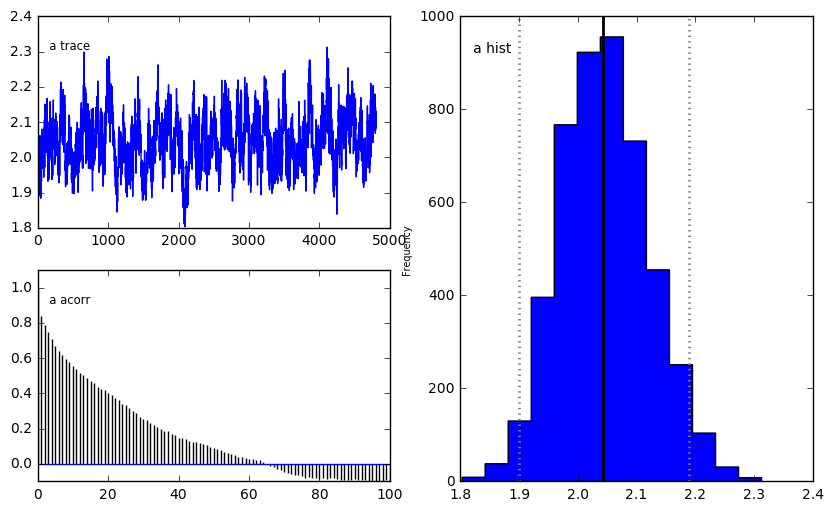

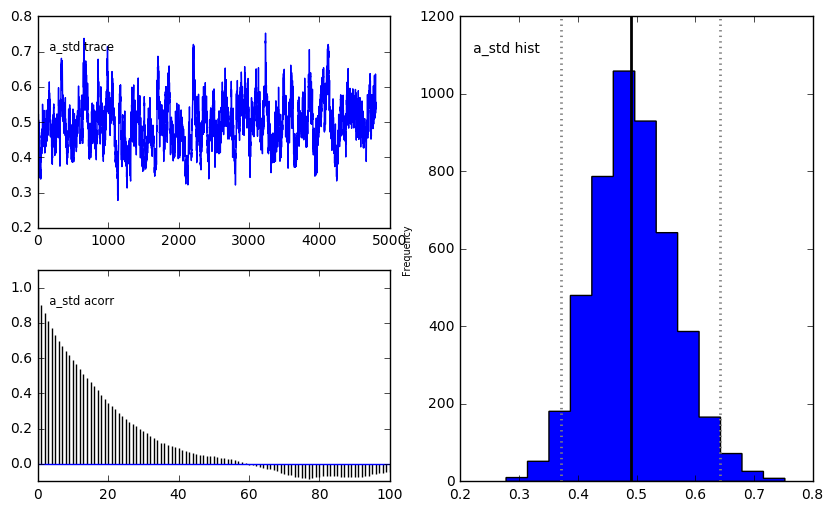

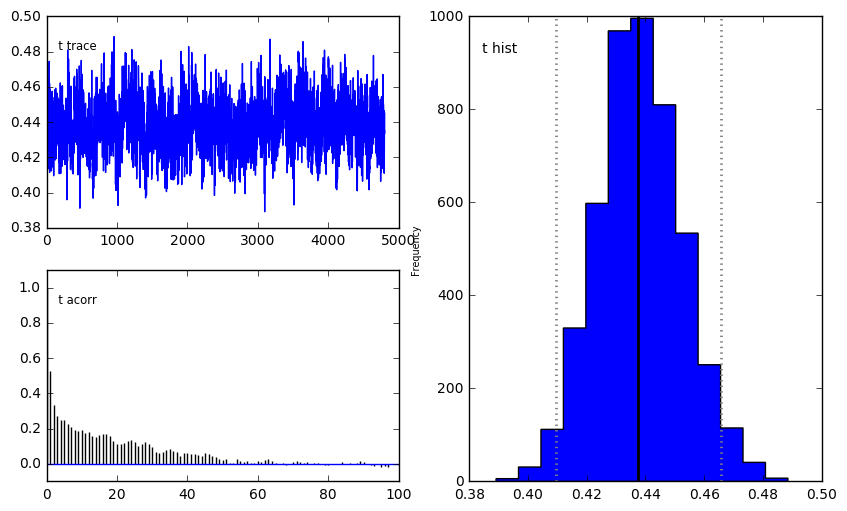

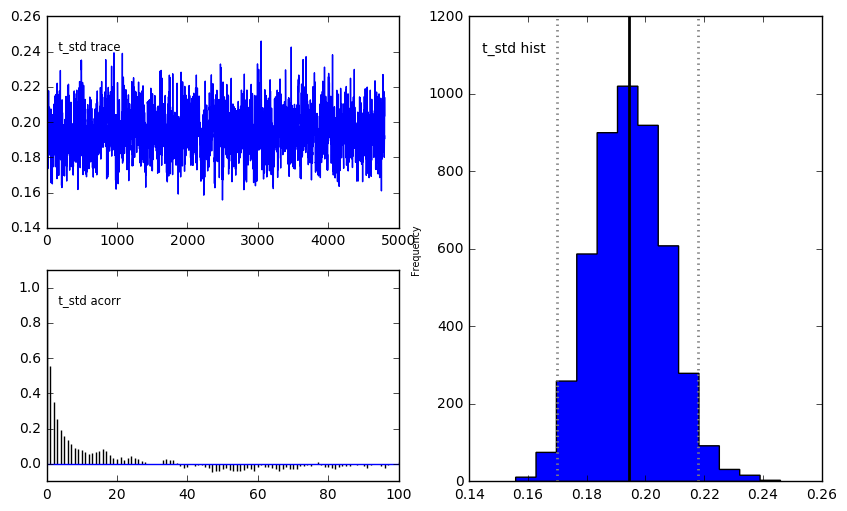

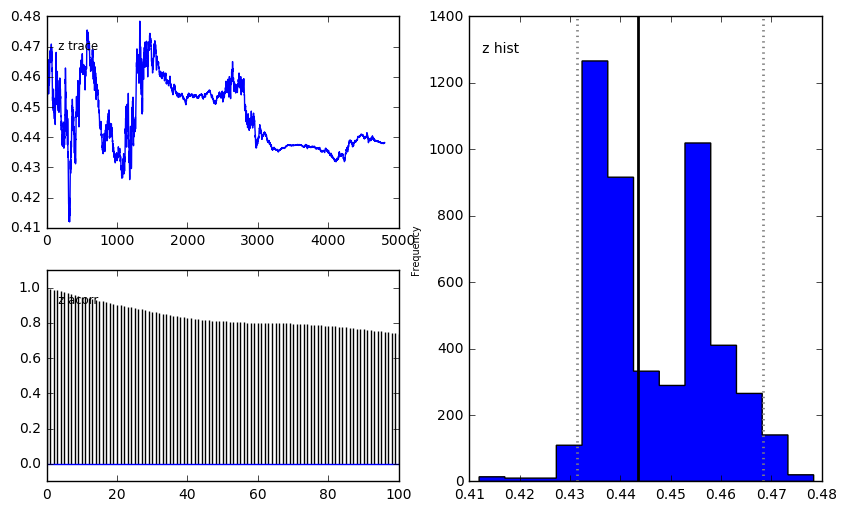

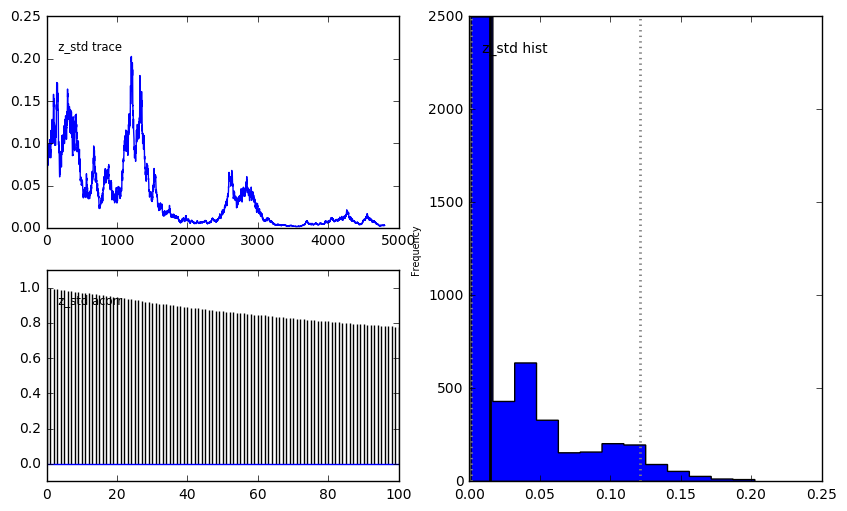

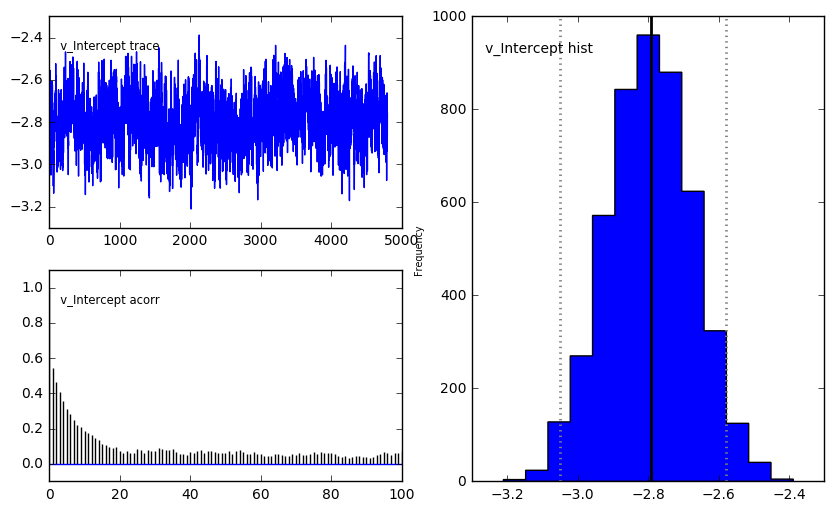

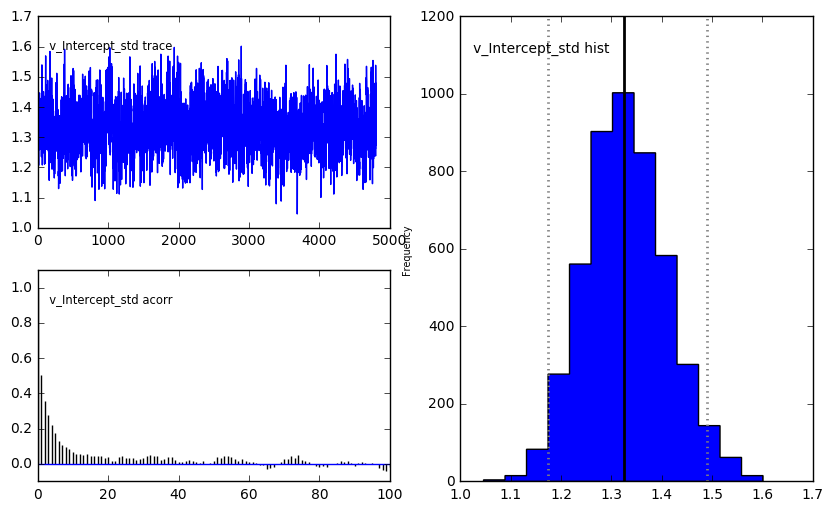

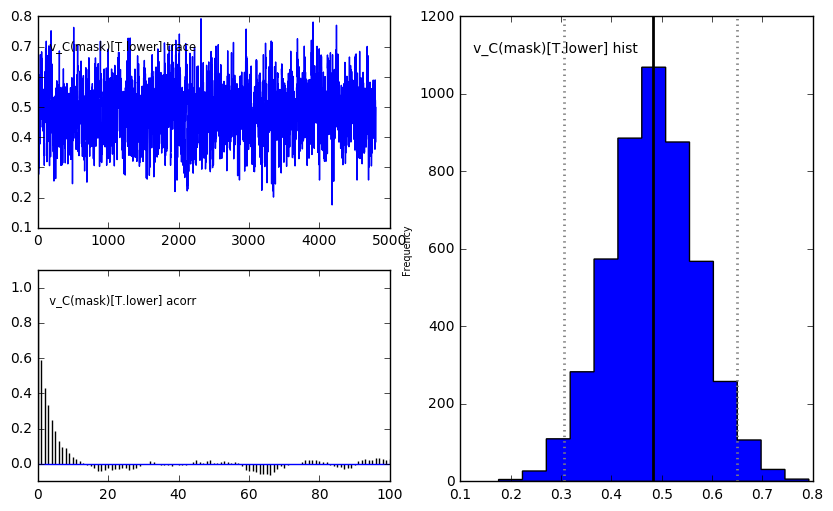

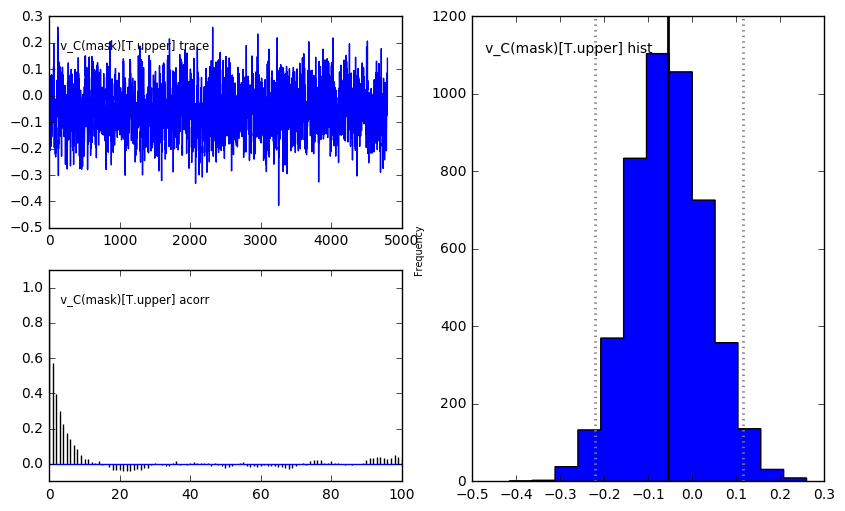

In [41]:
# run model
m_sh.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_sh.print_stats()
m_sh.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std      2.5q       25q  \
a                                   2.04646   0.074951   1.90977   1.99215   
a_std                              0.494387  0.0685997  0.367543  0.448244   
a_subj.09coqg8hlpux6fe              1.60232   0.314979   1.06325   1.37054   
a_subj.0b3t2skj9mlhbkn              2.20331   0.475092   1.40736   1.86523   
a_subj.0bcg7mtj2n1jjw9              2.90322    0.65529   1.88785   2.44101   
a_subj.0s53r30oouek89b              2.68901   0.506443   1.86016   2.32811   
a_subj.0uj9gbhag3o1w1v              2.38154   0.527737    1.5474   2.00655   
a_subj.17nzn4k8r1qkmrn               2.1064   0.464554   1.32069   1.78321   
a_subj.1fdkw2qjx3hc3lk              2.04653   0.445828   1.32044   1.72239   
a_subj.1mla0dmotqefnav              2.20829   0.446427   1.48181   1.87856   
a_subj.23hr9tl84h3zhw3               2.3903   0.320231   1.81858   2.17195   
a_subj.27muqwvalwne26r               1.9708   0.428102   1.23645

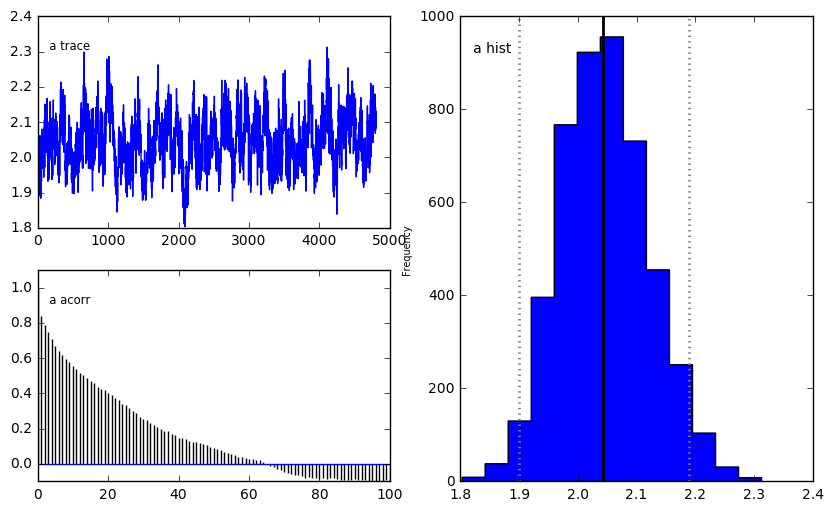

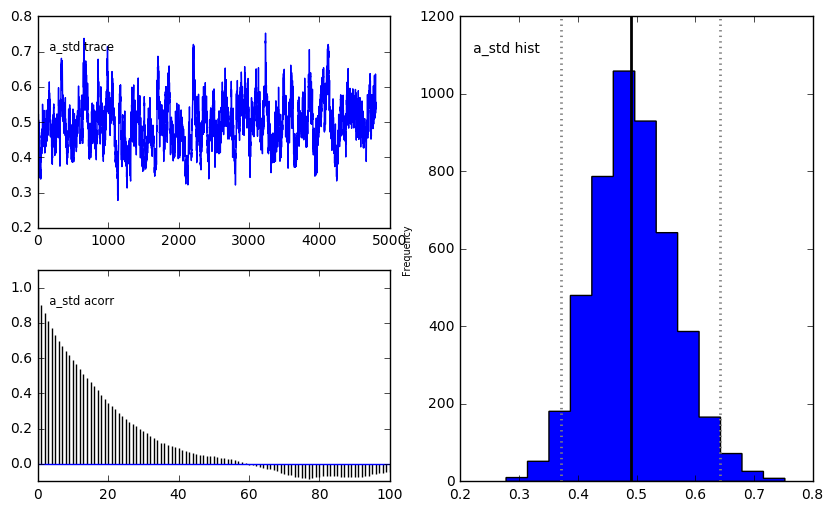

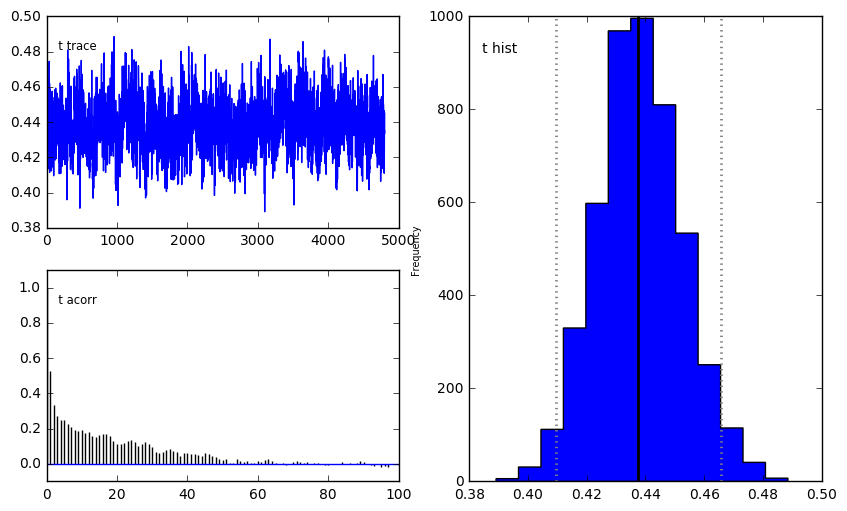

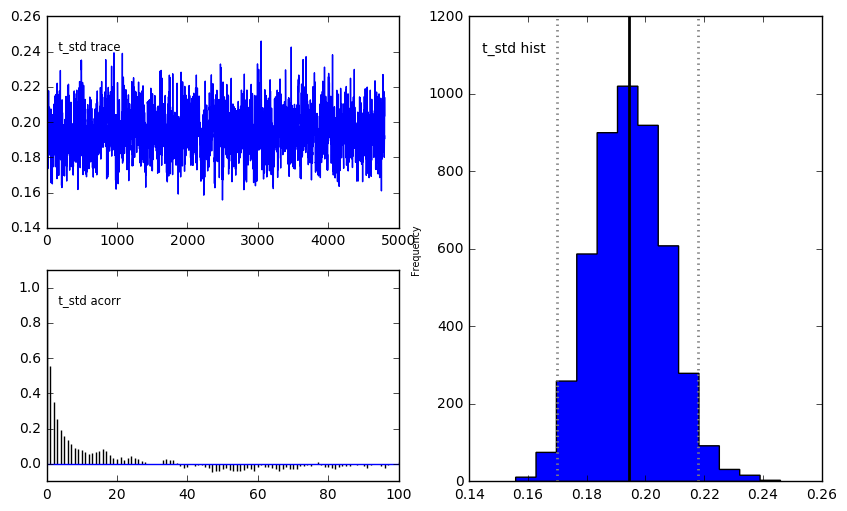

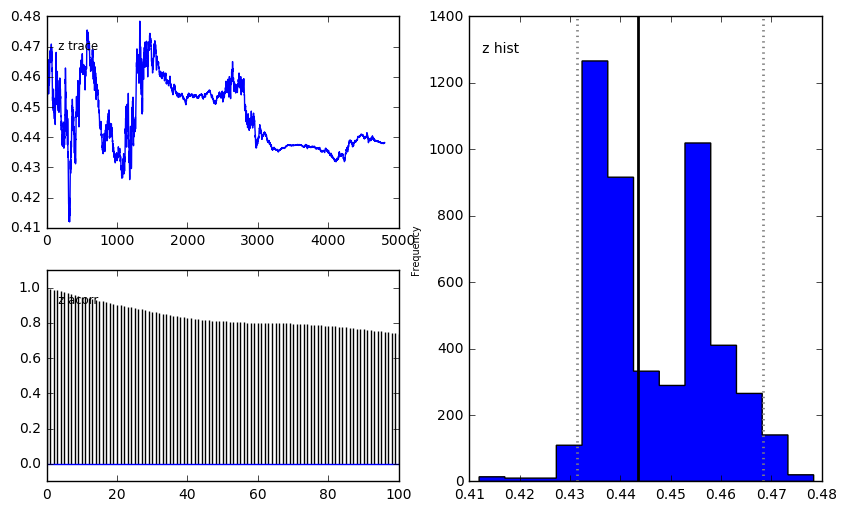

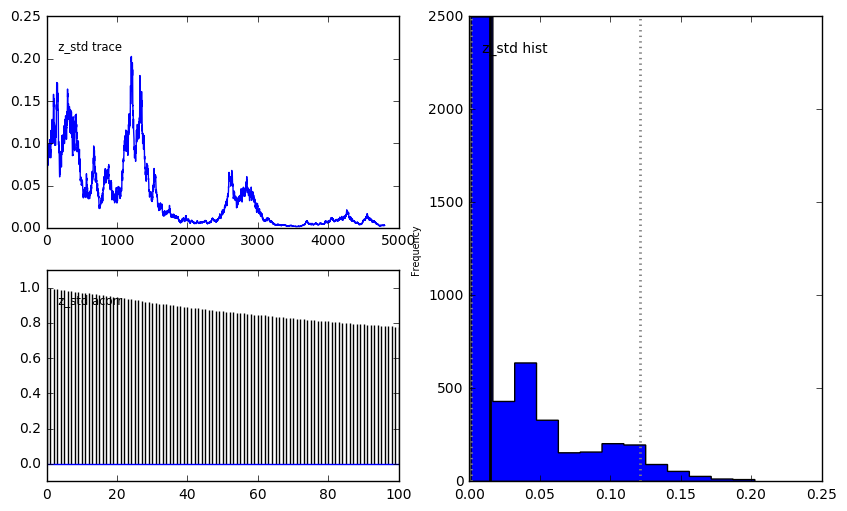

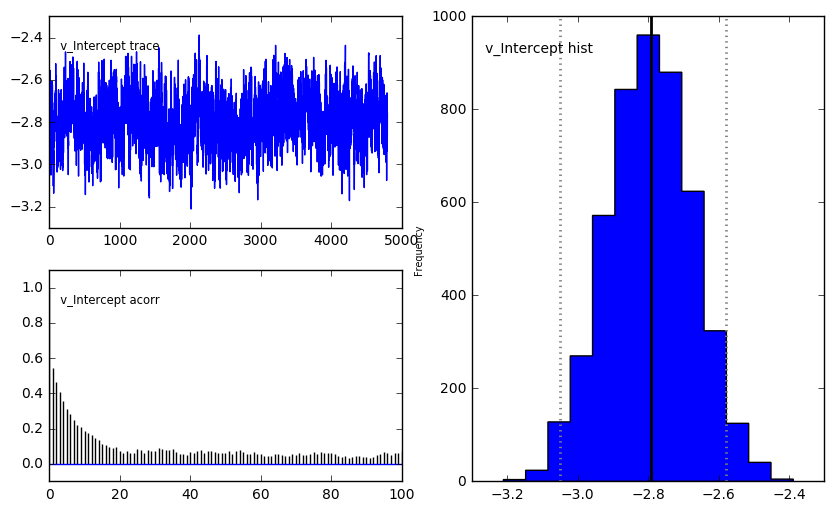

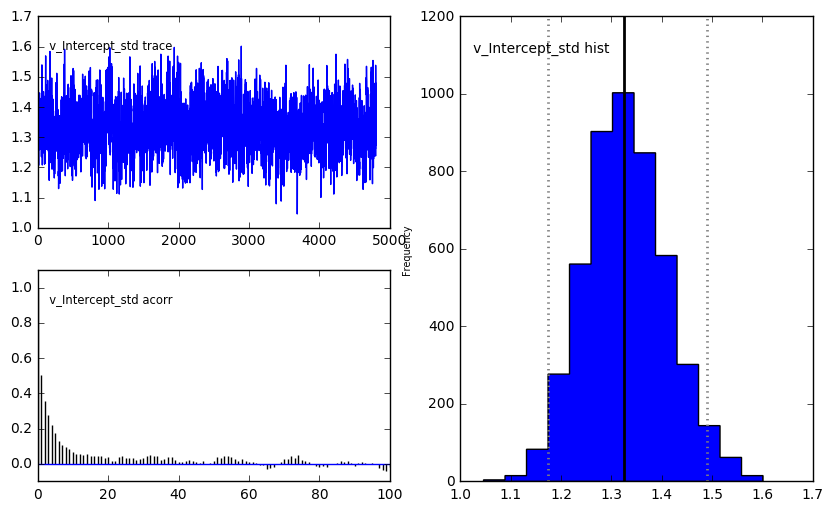

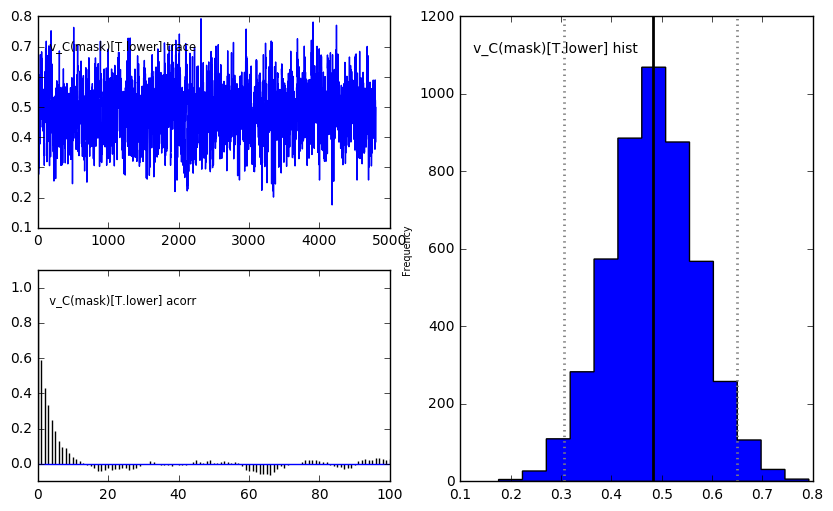

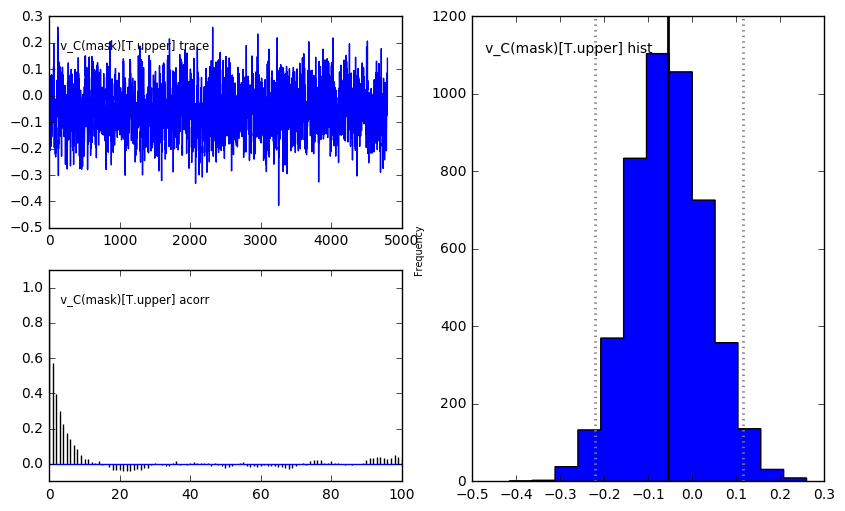

In [42]:
# save model stats
sh_stats = m_sh.gen_stats()
print(sh_stats)
sh_stats.to_csv('sh_5000/faceMask_hddm_drift_maskFalsePositives_sh_5000.csv', index=True)

# save model posterior plots
m_sh.plot_posteriors(path='sh_5000/_posteriors', save=True)

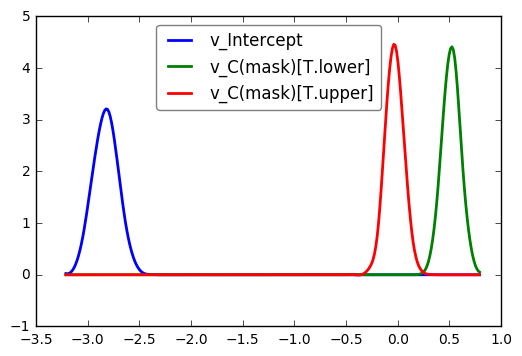

In [43]:
# plot model posteriors by mask
sh_v_none, sh_v_lower, sh_v_upper = m_sh.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([sh_v_none, sh_v_lower, sh_v_upper])
plt.savefig('sh_5000/faceMask_hddm_drift_maskFalsePositives_sh_5000_v_mask.pdf')

In [44]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(sh_v_none < 0) = ", (sh_v_none.trace() < 0).mean())
print("P(sh_v_lower < 0) = ", (sh_v_lower.trace() < 0).mean())
print("P(sh_v_upper > 0) = ", (sh_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(sh_v_lower < sh_v_upper) = ", (sh_v_lower.trace() < sh_v_upper.trace()).mean())

P(sh_v_none < 0) =  1.0
P(sh_v_lower < 0) =  0.0
P(sh_v_upper > 0) =  0.262708333333
P(sh_v_lower < sh_v_upper) =  0.0


In [27]:
# subset dataset by emotion rating type (sad) and facial expression (surprised)
sr_data = data.loc[(data['emotionRating'] == 'sad') & (data['expression'] == 'surprised')]
sr_data.head(10)

subj_idx  block  faceList emotionRating  trial  \
114  lbmmswtrr0mpvov      2         1           sad    114   
121  lbmmswtrr0mpvov      2         1           sad    121   
123  lbmmswtrr0mpvov      2         1           sad    123   
127  lbmmswtrr0mpvov      2         1           sad    127   
134  lbmmswtrr0mpvov      2         1           sad    134   
144  lbmmswtrr0mpvov      2         1           sad    144   
150  lbmmswtrr0mpvov      2         1           sad    150   
151  lbmmswtrr0mpvov      2         1           sad    151   
159  lbmmswtrr0mpvov      2         1           sad    159   
540  mr81dhy9r5lxu8r      4         3           sad    221   

                stimulus      face model ethnicity sex expression      mask  \
114  _faces/HF05_R_U.jpg  HF05_R_U  HF05         H   F  surprised     upper   
121  _faces/AM11_R_L.jpg  AM11_R_L  AM11         A   M  surprised     lower   
123  _faces/WM09_R_L.jpg  WM09_R_L  WM09         W   M  surprised     lower   
127  _faces/HF05_R_X.jpg  HF05_R_X  HF05         H   F  surprised  baseline   
134  _faces/AM11_R_U.jpg  AM11_R_U  AM11         A   M  surprised     upper   
144  _faces/WM09_R_X.jpg  WM09_R_X  WM09         W   M  surprised  baseline   
150  _faces/AM11_R_X.jpg  AM11_R_X  AM11         A   M  surprised  baseline   
151  _faces/HF05_R_L.jpg  HF05_R_L  HF05         H   F  surprised     lower   
159  _faces/WM09_R_U.jpg  WM09_R_U  WM09         W   M  surprised     upper   
540  _faces/AM04_R_L.jpg  AM04_R_L  AM04         A   M  surprised     lower   

     response        rt  faceAngry  faceDisgusted  faceFearful  faceHappy  \
114         0 -0.757255          0              0            0          0   
121         1  1.437810          0              0            0          0   
123         0 -0.765785          0              0            0          0   
127         0 -0.827480          0              0            0          0   
134         0 -1.555415          0              0            0          0   
144         0 -0.900800          0              0            0          0   
150         1  1.093540          0              0            0          0   
151         0 -0.780670          0              0            0          0   
159         0 -0.620510          0              0            0          0   
540         0 -1.484000          0              0            0          0   

     faceSad  faceSurprised  
114        0             50  
121        0             50  
123        0             50  
127        0            100  
134        0             50  
144        0            100  
150        0            100  
151        0             50  
159        0             50  
540        0             50

In [62]:
# drop any subjects missing columns in design matrix (otherwise produces error)
sr_data = sr_data[(sr_data.subj_idx != 'dqph4ch0mkofejw') & (sr_data.subj_idx != 'jkgqk1co77rw24c') & (sr_data.subj_idx != 'me8doxrmo9vj9dx') & (sr_data.subj_idx != 'n1w02b847xslowd') & (sr_data.subj_idx != ' j2qezlblp8v0dh6') & (sr_data.subj_idx != 'hdn2l3df216jykn') & (sr_data.subj_idx != 'xs5439nm2v85thb')]

In [63]:
# define model
m_sr = hddm.HDDMRegressor(sr_data, "v ~ C(mask)", bias=True, p_outlier=0.05)

Adding these covariates:
['v_Intercept', 'v_C(mask)[T.lower]', 'v_C(mask)[T.upper]']


C:\Users\becky\Anaconda3\lib\site-packages\pymc\Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 5001 of 5000 complete in 38945.7 sec

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std       2.5q        25q        50q        75q       97.5q       mc err
a                                   1.92234  0.0610209    1.80946    1.87968    1.92118    1.96307     2.04723   0.00304573
a_std                              0.588562  0.0525063   0.490726   0.552656    0.58648   0.622248    0.693339   0.00282187
a_subj.09coqg8hlpux6fe              1.65258   0.276718    1.19053    1.45977    1.62604    1.81728     2.27235   0.00553589
a_subj.0b3t2skj9mlhbkn              1.63196   0.266111    1.18676    1.43827    1.60488    1.80205     2.20728    0.0063712
a_subj.0bcg7mtj2n1jjw9              2.90199   0.397863    2.22294    2.61867    2.87268    3.14995     3.76601   0.00777369
a_subj.0s53r30oouek89b              2.37703   0.359509    1.73043    2.12985    2.35408     2.6035     3.17269   0.00766885
a_subj.0uj9gbhag3o1w1v              2.63111   0.621523    1.62074    2.18508    2.57153    3.00303     4.00834    0.0187798
a_subj.1

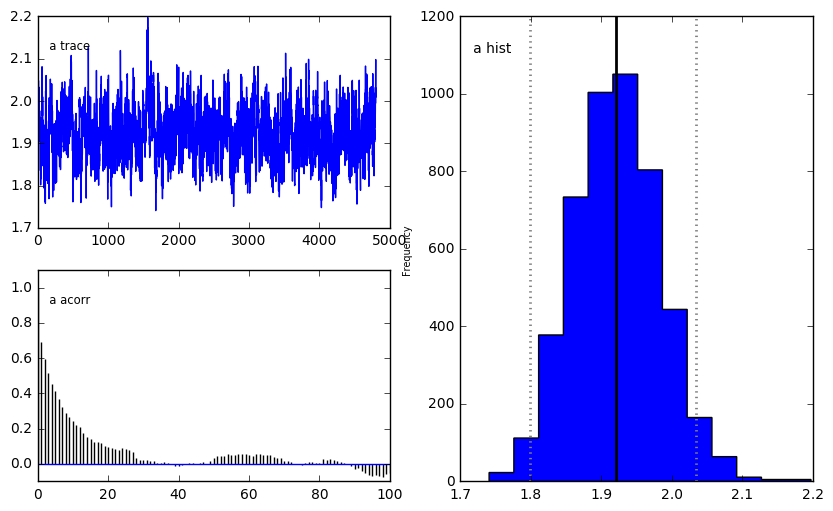

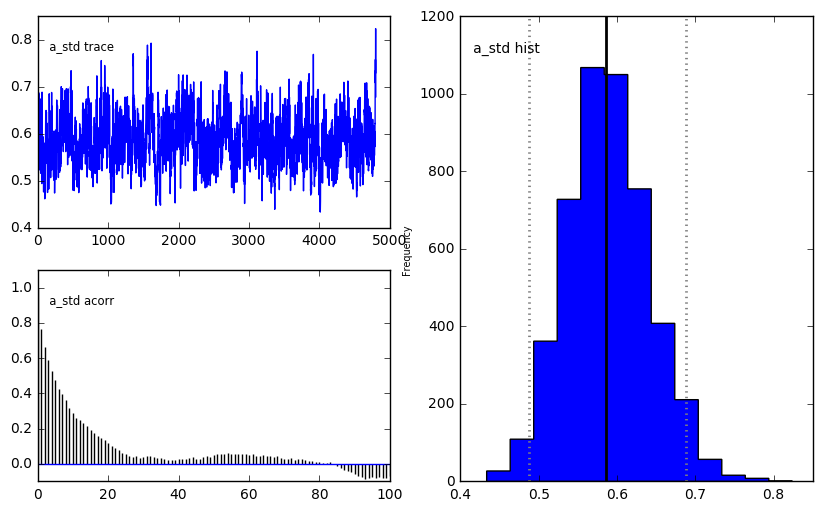

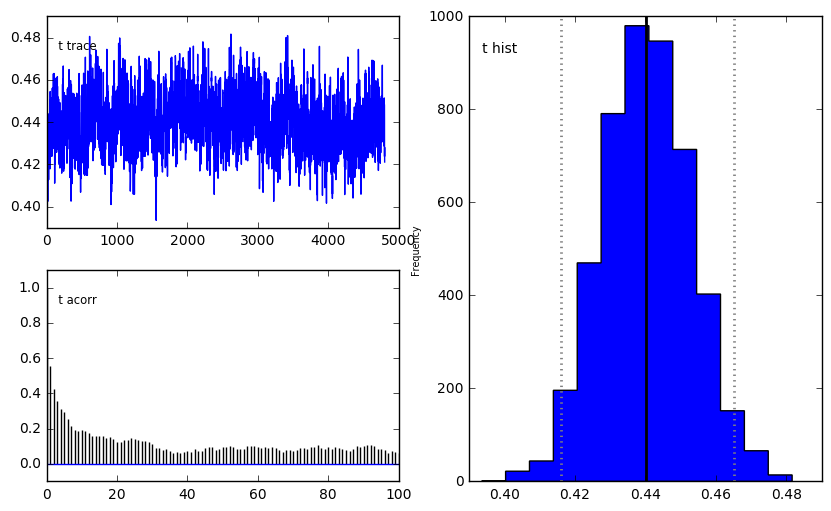

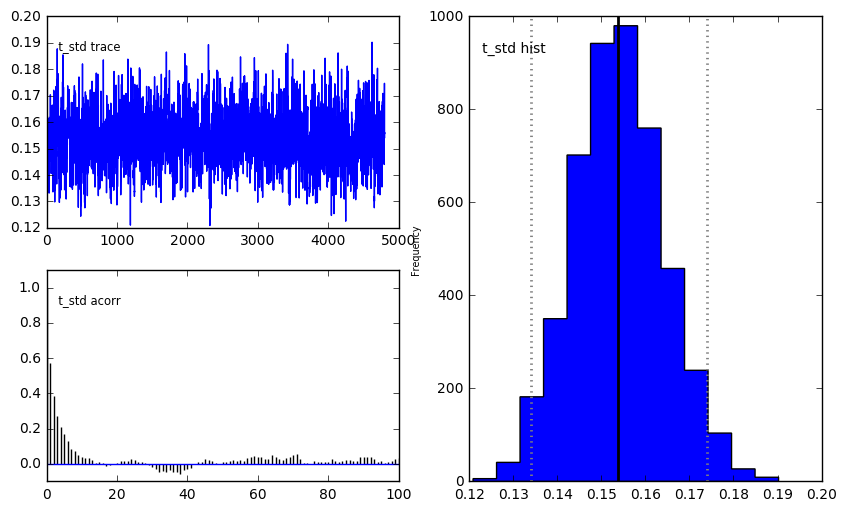

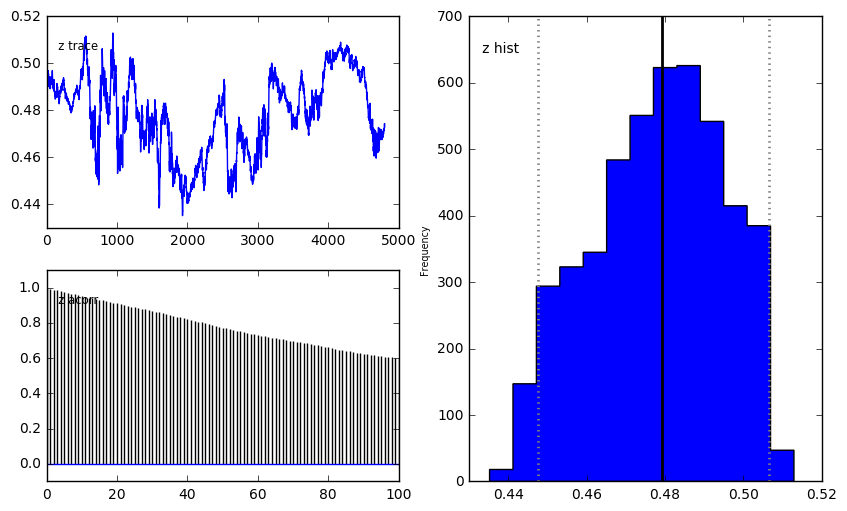

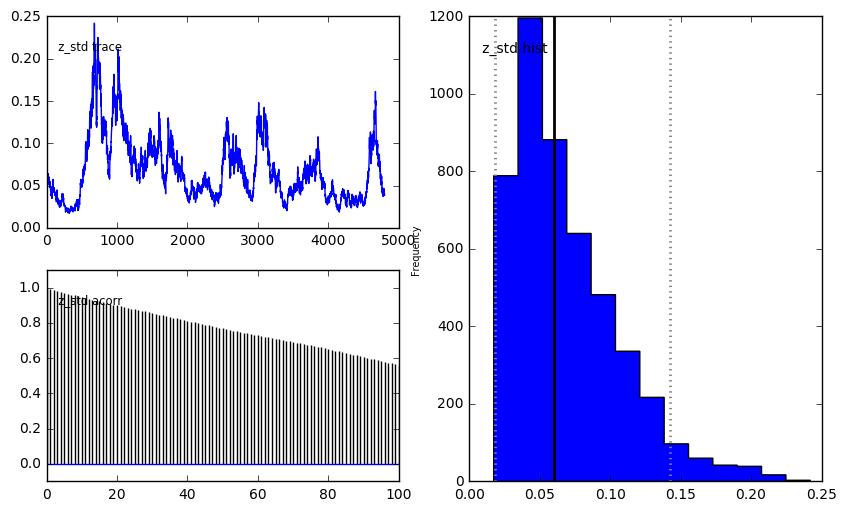

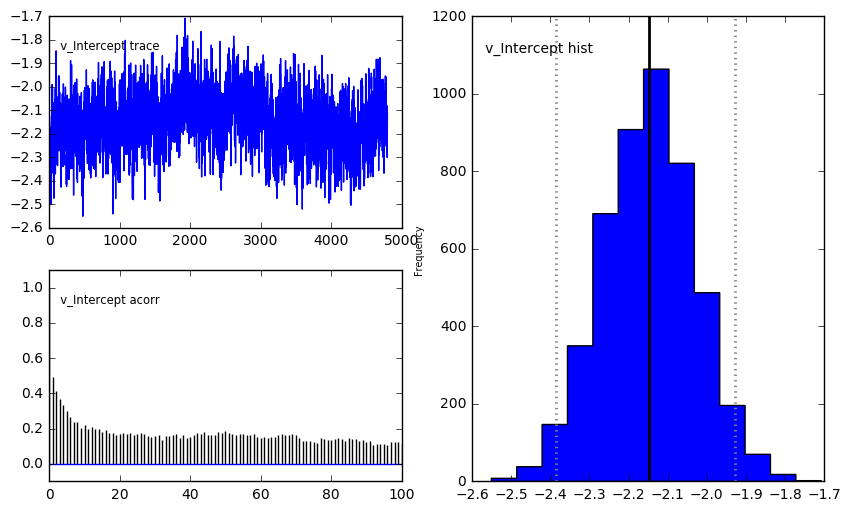

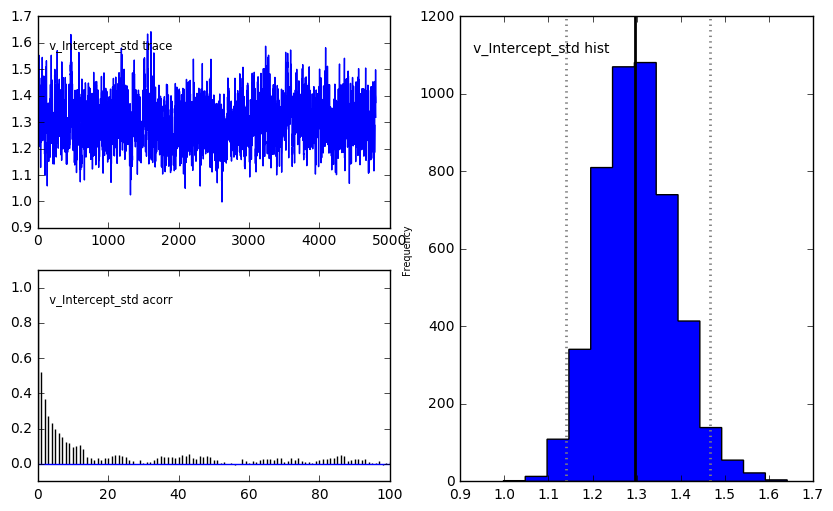

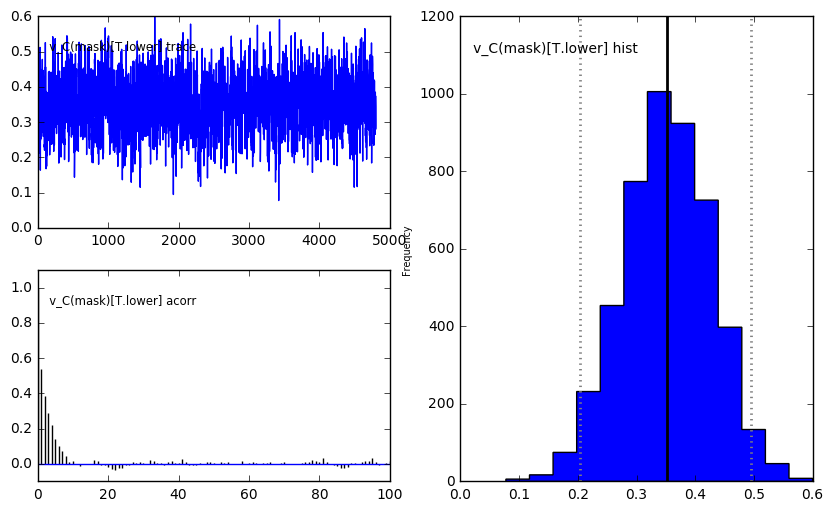

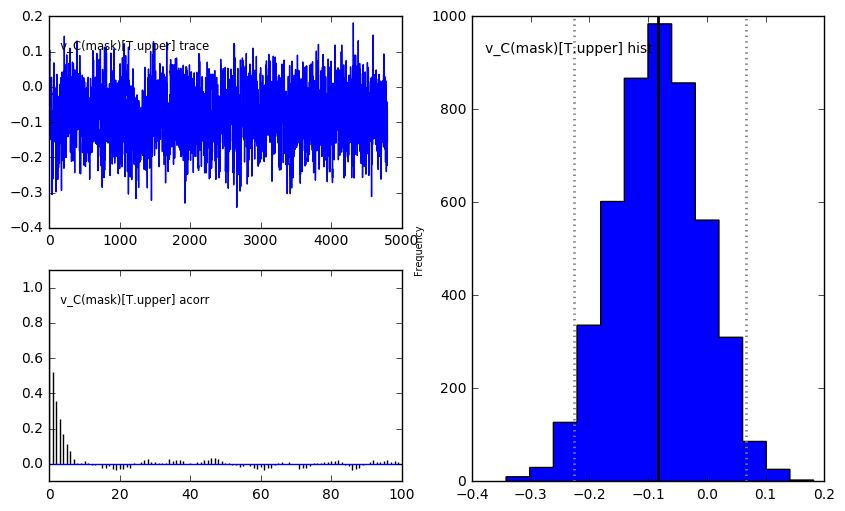

In [64]:
# run model
m_sr.sample(5000, burn=200, dbname='traces.db', db='pickle')
m_sr.print_stats()
m_sr.plot_posteriors()

C:\Users\becky\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:225: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)


                                       mean        std      2.5q        25q  \
a                                   1.92234  0.0610209   1.80946    1.87968   
a_std                              0.588562  0.0525063  0.490726   0.552656   
a_subj.09coqg8hlpux6fe              1.65258   0.276718   1.19053    1.45977   
a_subj.0b3t2skj9mlhbkn              1.63196   0.266111   1.18676    1.43827   
a_subj.0bcg7mtj2n1jjw9              2.90199   0.397863   2.22294    2.61867   
a_subj.0s53r30oouek89b              2.37703   0.359509   1.73043    2.12985   
a_subj.0uj9gbhag3o1w1v              2.63111   0.621523   1.62074    2.18508   
a_subj.17nzn4k8r1qkmrn              2.09893     0.3664   1.49606    1.83341   
a_subj.1fdkw2qjx3hc3lk              2.01619   0.453379   1.26917    1.69895   
a_subj.1mla0dmotqefnav              2.00595   0.480715   1.23737     1.6578   
a_subj.23hr9tl84h3zhw3              2.24691   0.366851   1.61443    1.98628   
a_subj.27muqwvalwne26r               1.8335   0.4803

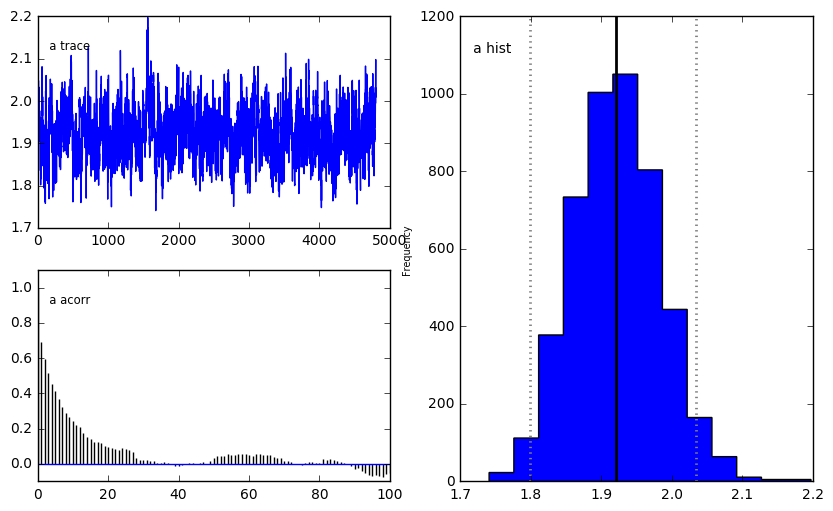

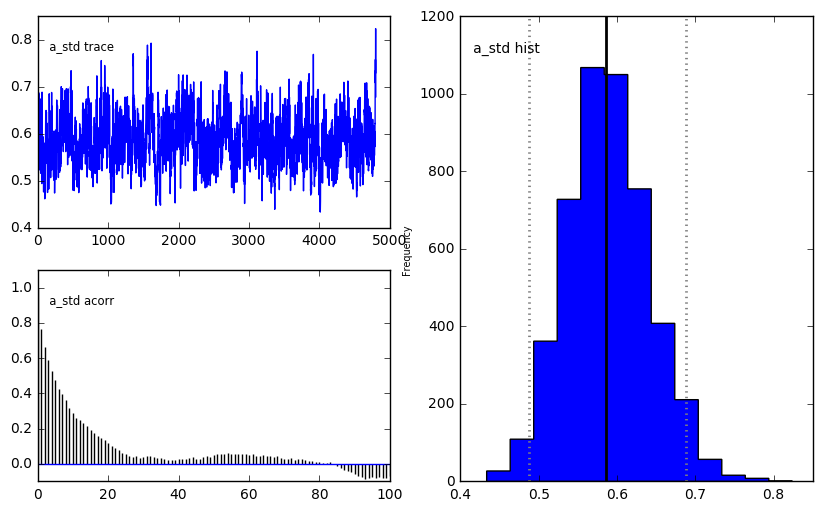

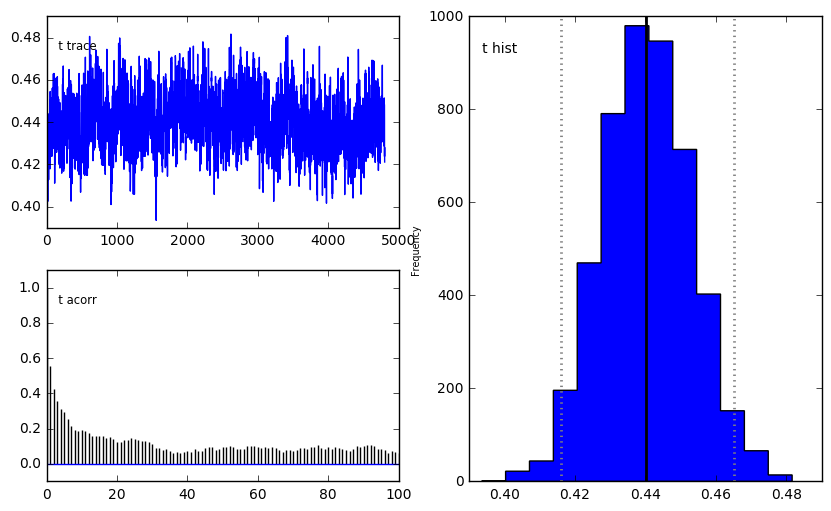

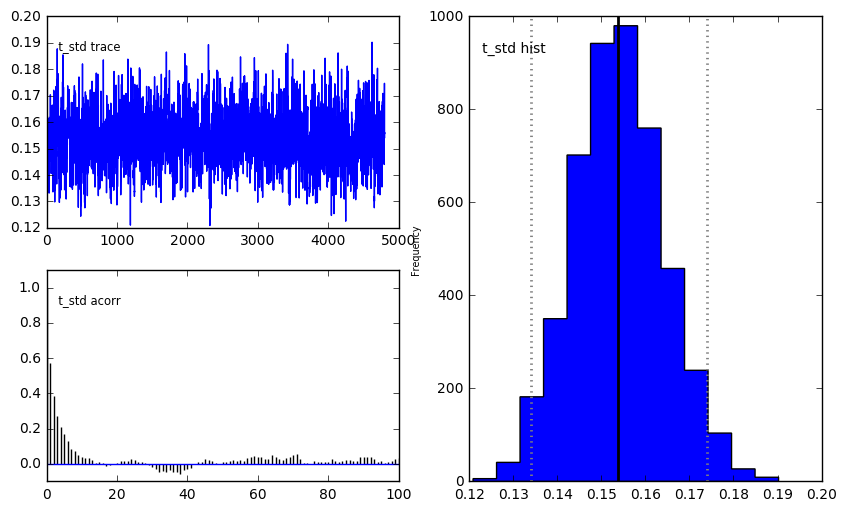

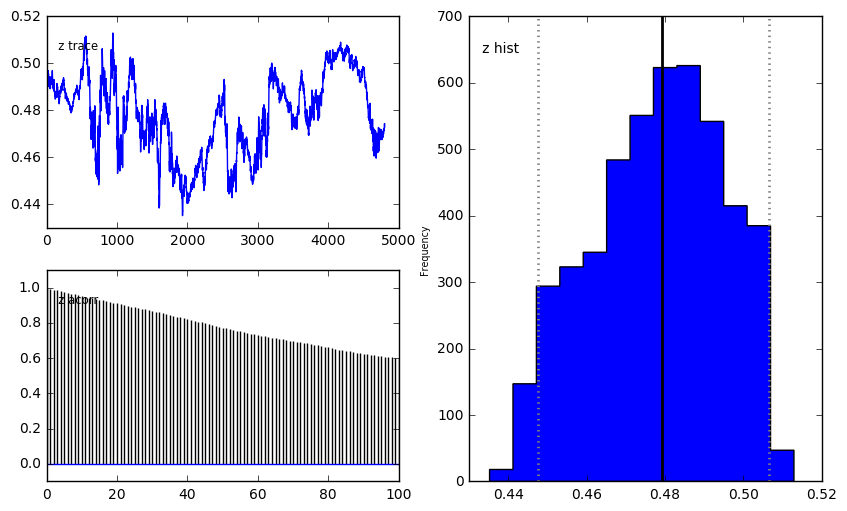

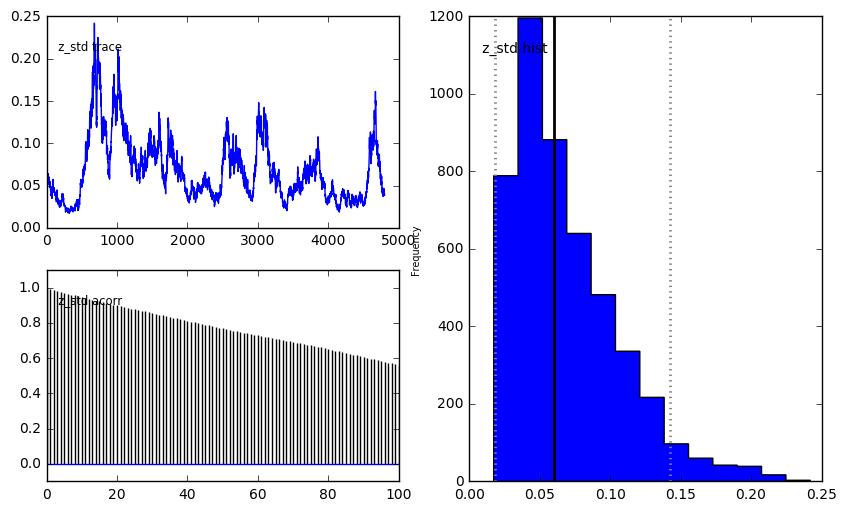

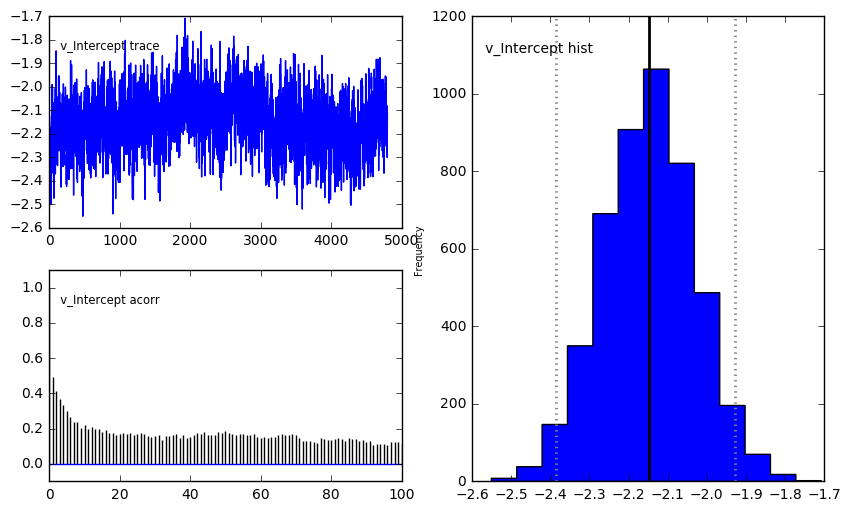

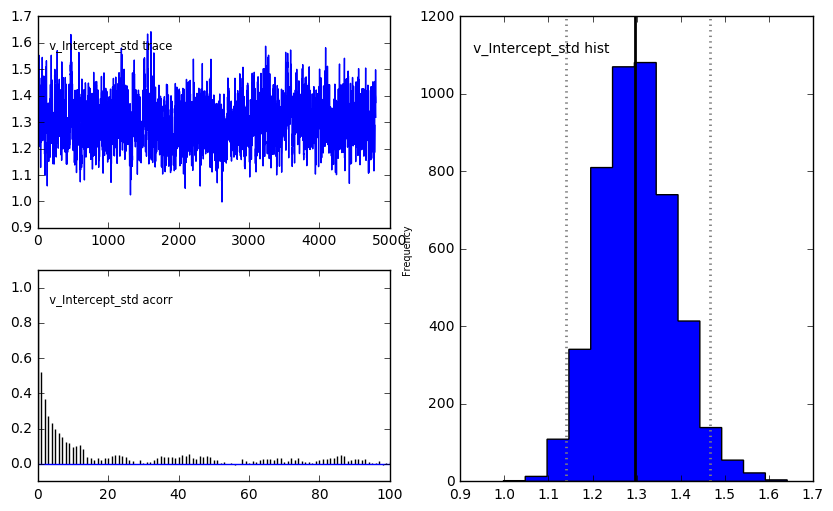

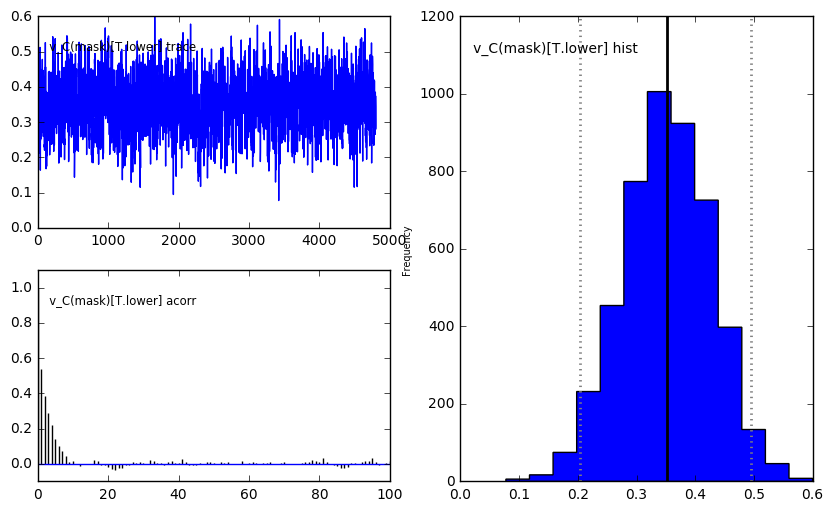

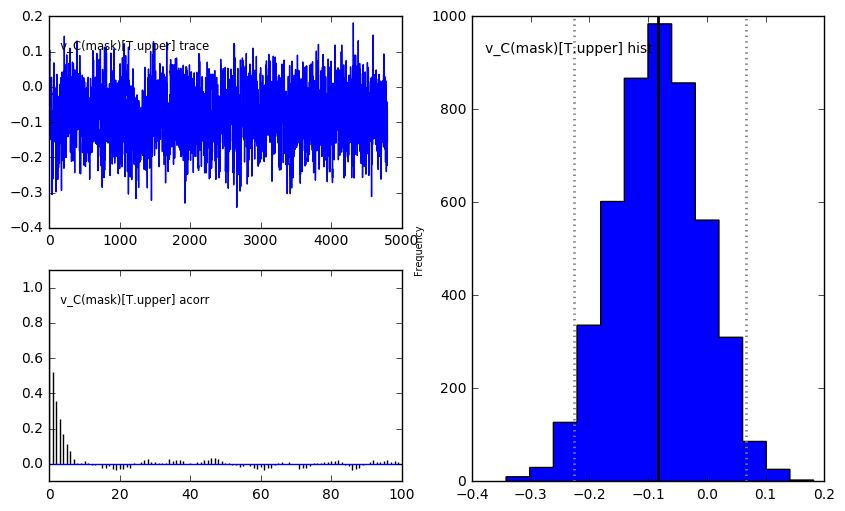

In [68]:
# save model stats
sr_stats = m_sr.gen_stats()
print(sr_stats)
sr_stats.to_csv('sr_5000/faceMask_hddm_drift_maskFalsePositives_sr_5000.csv', index=True)

# save model posterior plots
m_sr.plot_posteriors(path='sr_5000/_posteriors', save=True)

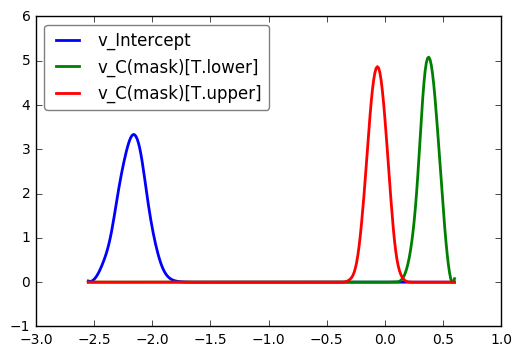

In [69]:
# plot model posteriors by mask
sr_v_none, sr_v_lower, sr_v_upper = m_sr.nodes_db.node[["v_Intercept", "v_C(mask)[T.lower]", "v_C(mask)[T.upper]"]]
hddm.analyze.plot_posterior_nodes([sr_v_none, sr_v_lower, sr_v_upper])
plt.savefig('sr_5000/faceMask_hddm_drift_maskFalsePositives_sr_5000_v_mask.pdf')

In [70]:
## estimate probabilities that mask coefficient posteriors differ from 0
# note that comparison condition coefficients (i.e. lower/upper) are *relative to* baseline condition (i.e. no mask)
# for lower/upper, =0 means no change from baseline, <0 means less than baseline, and >0 means greater than baseline
# for no mask, =0 means null drift, <0 means negative drift, and >0 means positive drift
print("P(sr_v_none < 0) = ", (sr_v_none.trace() < 0).mean())
print("P(sr_v_lower < 0) = ", (sr_v_lower.trace() < 0).mean())
print("P(sr_v_upper > 0) = ", (sr_v_upper.trace() > 0).mean())

# estimate probability that lower and upper mask coefficient posteriors differ
print("P(sr_v_lower < sr_v_upper) = ", (sr_v_lower.trace() < sr_v_upper.trace()).mean())

P(sr_v_none < 0) =  1.0
P(sr_v_lower < 0) =  0.0
P(sr_v_upper > 0) =  0.140833333333
P(sr_v_lower < sr_v_upper) =  0.0
